# Aggregate Data Modeling for Auto Clients

##Step 0: Read the Notebook Instructions

**Notebook credits:**

A special thanks to @dschneid and @megangodfrey - our LCS Americas Marketing Science Leads for sharing the initial Aggregate Data Modeling code with us. As well as @tcomandatore for valuable feedback on the code.

**POC's for this notebook version:**

@kunaldeshmukh - SE GCAS

@gabrielagf - Analytical Consultant LCS UK


This notebook is written in **Python**. If you are a new to Python and wish to understand the code in this notebook, please see the following external resources:

*   [W3 Schools](https://www.w3schools.com/python/) - Learn with examples
*   Udemy [Introduction to Python](https://www.udemy.com/course/pythonforbeginnersintro/?LSNPUBID=JVFxdTr9V80&ranEAID=JVFxdTr9V80&ranMID=39197&ranSiteID=JVFxdTr9V80-i7XuzzUFIZVuik1RYFakbA&utm_medium=udemyads&utm_source=aff-campaign) & [Python for Beginners](https://www.udemy.com/course/python-hackcc/?LSNPUBID=JVFxdTr9V80&ranEAID=JVFxdTr9V80&ranMID=39197&ranSiteID=JVFxdTr9V80-gD1CoaeD0d4a01whz6_daQ&utm_medium=udemyads&utm_source=aff-campaign) - Free tutorials
*   Codecademy [Python 2 Course](https://www.codecademy.com/learn/learn-python?periods=year&plan_id=proGoldAnnualV2&utm_source=pepperjam&utm_medium=affiliate&utm_term=214453&clickId=4279968563&pj_creativeid=8-12462&pj_publisherid=214453) - Free Tutorials
*   Coursera [Python for Everybody](https://www.coursera.org/specializations/python?irclickid=XSk1QORInxyNUDiWNRRKH1RiUkA3cq0Oj0eK3s0&irgwc=1&utm_medium=partners&utm_source=impact&utm_campaign=3294490&utm_content=b2c) Specialization with University of Michigan - Free course with certificate

This notebook is written for analysts with a basic understanding of statistical concepts such as regression, p-values, multicollinearity etc. However we **don't require coding experience as the notebook is completely automated**.

**General Instructions to run the notebook:**

1) Section 0 is the only section where user input is required. We need the file name of your data input. In this section you can also update model parameters if desired.

2) In Section 0 we also install packages and libraries. This ntoebook may require packages you haven't used before. After you install these packages you can restart your runtime via the **Runtime --> Restart Runtime** option in the top menu

3) Once you have completed Section 0, head to **Runtime --> Run All** in the runtime option in the top menu, sit back and relax while the whole notebook runs at once.

**FYI:**

1) Throughout the code we will be downloading some png files to the Files tab on the left panel of your Colab notebook. These files can then be used as visuals in your decks. Watch out for the 📸 icon for steps that involve an image output.

**How to take the outputs of this notebook to your client?**

We have created a [template output deck](https://docs.google.com/presentation/d/1I5KaiYPO2cirXDpQqn2sZeVNgHW2jIKvMvvo0FQXFQU/edit?resourcekey=0-NdqKTHIVaUQQQJDhQ_bmsQ#slide=id.g20f2925954c_0_656) for your model results.

**Have questions on the code? Need some help?**

Join our mailing group: [Data-Modelling-For-VBB](https://groups.google.com/a/google.com/g/data-modelling-for-vbb)

**I heard I get a MoMa Badge for running this notebook...**

Yes! Once you have created your output deck based on this notebook, we ask that you drop it into [this shared drive](https://drive.google.com/corp/drive/folders/1Fec1t1O9wwKG-MMXLujrc1goGCudMHJX?resourcekey=0-kbXK4Y7yFOtyllFif73_Fw). We will then issue you a MoMa badge!

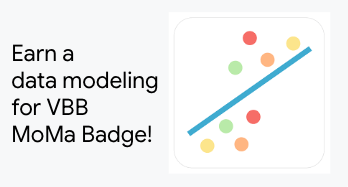

**HAPPY AGGREGATE DATA MODELING** 👏 👏 👏

In [ ]:
#@title User Input - Data Input File Name
#@markdown Upload your data input as a CSV file by clicking the folder icon in the left panel of your code notebook. You will then see an upload file icon  Head to the file you uploaded, right-click and click "copy path". Paste the path in the File Name input below.
file_name = '/content/VBB_Sample_DS - Sheet1 (1).csv'  #@param {type:"string"}

In [ ]:
#@title Optional User Input - Defining the model parameters
#@markdown If you are new to Linear Models (p-values, test-train splits etc.) then we suggest you leave the model parameters as the recommended default. However, if you wish to update any model parameters then you may do so here.
aggregation_needed = 'Daily' # Change to 'Weekly' if you want to aggregate data at weekly level
train_test_split_method = 'random' # default is 'random' change to 'timeseries' for timeseries splitting
random_seed = 25
split_data_rand = 0.2 # Change to split the percentage datapoints in test dataset in random splitting method
split_data_ts = 0.8 # For time-series splitting method

clip_outliers = 'yes'# Change to 'yes' if you want to clip outliers
zero_values_threshold = 0.2 # Change to suitable percentage based upon the acceptable thresholds, for example if you want to drop columns with more than 60% zeros in them, change to 0.6
max_lag_daily = 45
max_lag_weekly = 8

vif_threshold = 7 # Change the default value if you want to preserve  some of the columns in Multi-collinearity
p_value_threshold = 0.1 #Change to incease/decrease the p value threshold for statistical significance



In [ ]:
  #@title Install packages and re-start kernel when executing code for the first time
  !pip install numpy==1.23
  !pip install statsmodels --upgrade
  !pip install relativeImp
  !pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Step 1: Data Import, Preparation & Importing Libraries


A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs.

In [ ]:
  #@title Import libraries
  import pandas as pd
  import pandas_gbq
  import numpy as np
  from datetime import datetime
  import datetime
  from dateutil.relativedelta import relativedelta
  from sklearn.preprocessing import StandardScaler
  import statsmodels.api as sm
  from statsmodels.stats.outliers_influence import variance_inflation_factor
  from statsmodels.tsa.stattools import adfuller
  from statsmodels.tools.tools import add_constant
  from sklearn.ensemble import RandomForestRegressor

  # data manipulation & modeling
  import pandas as pd
  import pandas_gbq
  import numpy as np
  import statsmodels.api as sm
  from sklearn.model_selection import TimeSeriesSplit
  from sklearn.linear_model import LinearRegression
  from math import sqrt
  from sklearn.metrics import mean_squared_error


  #plotting
  import matplotlib.pyplot as plt
  import plotly.express as px
  import seaborn as sns

  #plotting
  import matplotlib.pyplot as plt
  import plotly.express as px
  import seaborn as sns
  plt.rcParams['figure.figsize'] = [20, 10]
  from relativeImp import relativeImp
  print("All libraries imported")

All libraries imported


In [ ]:
#@title Import data
df = pd.read_csv(file_name)
df.fillna(0, inplace=True)
df.head()

,Date,Target,Conversion_1,Conversion_2,Conversion_3,Conversion_4,Conversion_5,Conversion_6,Conversion_7,Conversion_8,Conversion_9
0,9/24/2021,21,107,53,59,41,30,229,69,48,133
1,9/25/2021,20,153,43,23,87,39,339,106,52,180
2,9/26/2021,18,186,53,50,87,48,380,125,56,209
3,9/27/2021,17,196,45,72,74,50,341,131,64,238
4,9/28/2021,19,178,73,32,87,35,313,134,83,223


In [ ]:
#@title Drop Columns with high number of 0s
# calculate % of zeroes in each column
zero_counts = df.eq(0).sum(axis=0)
zero_percentages = zero_counts / len(df)

# select columns to drop
columns_to_drop = zero_percentages[zero_percentages > zero_values_threshold].index


print(f'The following columns are dropped: {", ".join(columns_to_drop)}')

# drop selected columns
df = df.drop(columns_to_drop, axis=1)


The following columns are dropped: Conversion_8


In [ ]:
#@title Converting data to the right data type
# Set the date variable to the column called 'Date' and target variable to the column called 'Target'
date_variable = 'Date'
kpi = 'Target'

# Converting date to pandas datetime format and setting it as the index of our dataframe
df = df.sort_values(by=date_variable)
df[date_variable] = pd.to_datetime(df[date_variable])
df = df.set_index(date_variable)

# Converting the rest of the variables to integer
df[kpi] = pd.to_numeric(df[kpi])
df = df.apply(pd.to_numeric)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2022-01-01 to 2022-09-09
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Target        494 non-null    int64
 1   Conversion_1  494 non-null    int64
 2   Conversion_2  494 non-null    int64
 3   Conversion_3  494 non-null    int64
 4   Conversion_4  494 non-null    int64
 5   Conversion_5  494 non-null    int64
 6   Conversion_6  494 non-null    int64
 7   Conversion_7  494 non-null    int64
 8   Conversion_9  494 non-null    int64
dtypes: int64(9)
memory usage: 38.6 KB
None


In [ ]:
#@title Splitting our data into predictor variables and target variable (KPI)

y = df[df.columns[df.columns == kpi]]
x = df[df.columns[df.columns != kpi]]

#Ensuring the data is sorted by date
x=x.sort_index(axis=0)
y=y.sort_index(axis=0)

In [ ]:
#@title Aggregating the data

if aggregation_needed == 'Weekly':
  x = x.resample('7D').sum()
  y = y.resample('7D').sum()
  max_lag = 8
else:
  max_lag = 45

In [ ]:
#@title Defining the test and train input datasets and the output 'y' variable

#@title Defining the test and train input datasets and the output 'y' variable

import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit

if train_test_split_method == 'random':
    # Split the data into a training set and a test set using random sampling
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split_data_rand, random_state=random_seed)
else:
    # Split the data into a training set and a test set using time-series splitting
    n_rows = len(x)
    split_index = int(n_rows * split_data_ts)
    X_train, X_test = x.iloc[:split_index], x.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


## Step 2: EDA (Exploratory Data Analysis)

In this section we will 'explore' our data.

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

This section involves concepts such as: understanding the data distribution with box plots (outlier detection), a time-series plot of our input and output variables, visualising the correlations between features, lagged variables and more.

Learn more about EDA and how to understand the charts here https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

### Input & Target Variable Visuals

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


([], [])

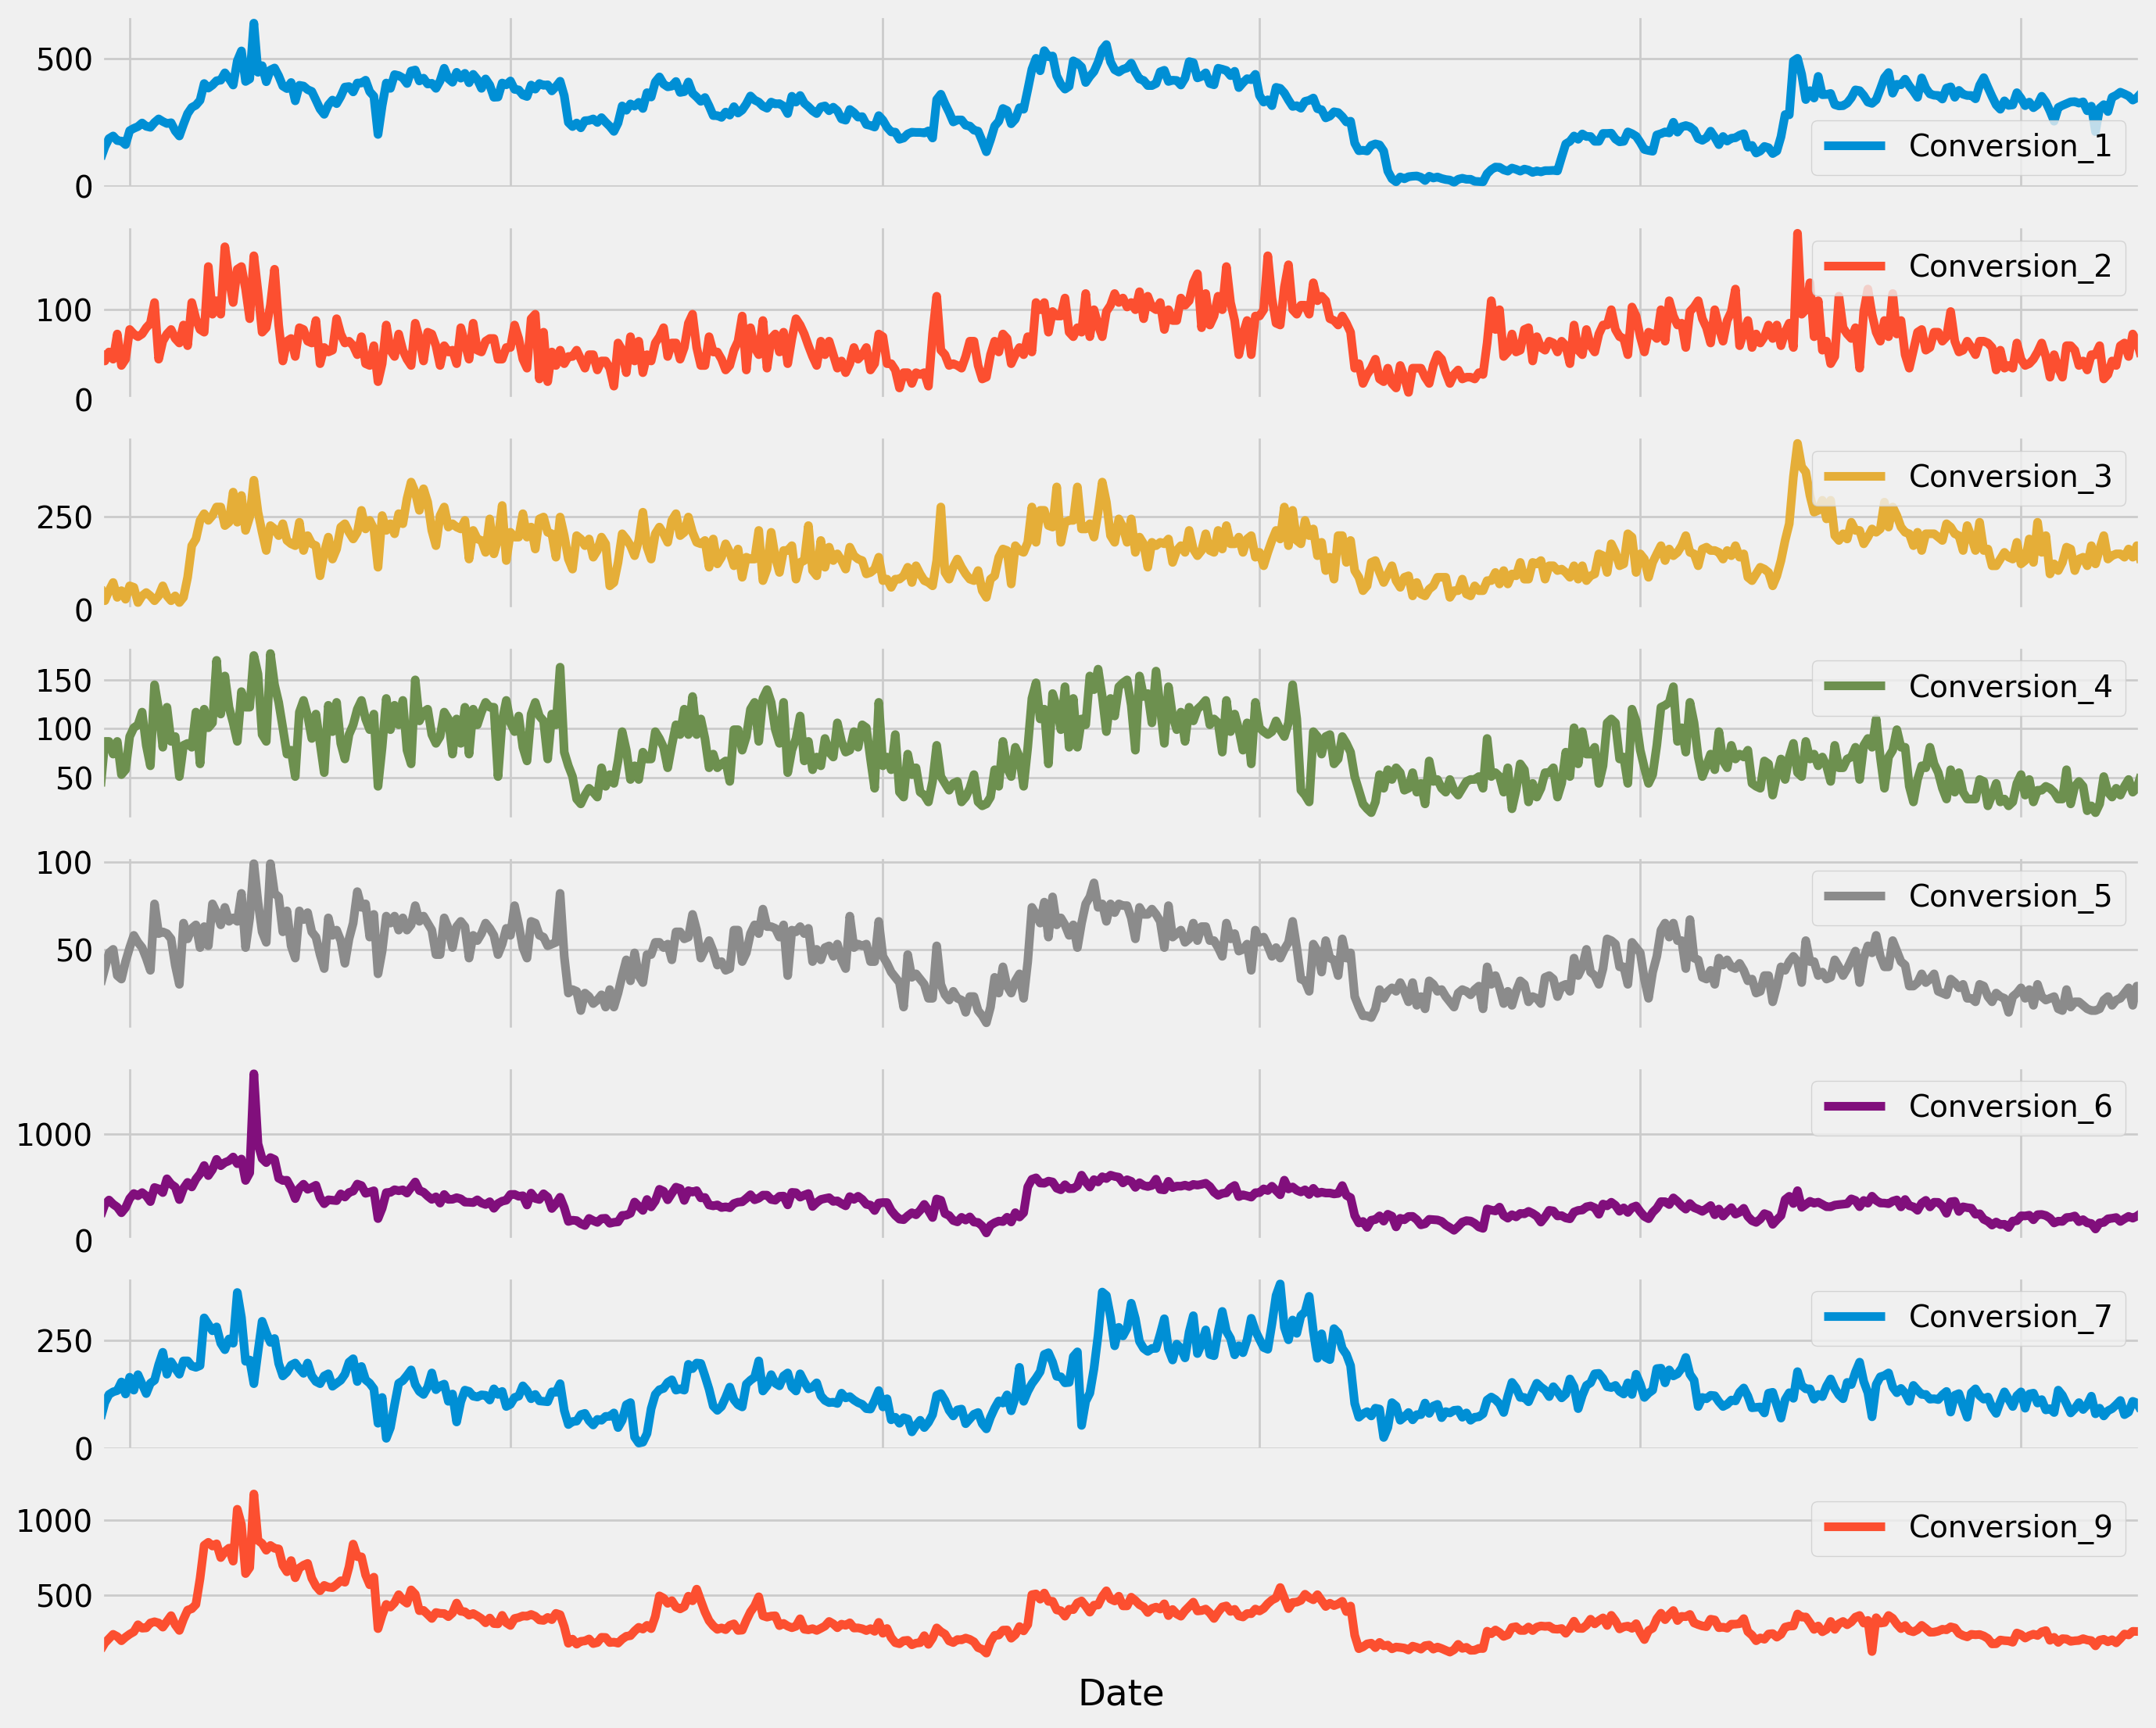

In [ ]:
#@title Input Variable Time Series 📸
from IPython.display import display
import matplotlib.pyplot as plt
plt.rcdefaults()

#Increase quality & resolution for the chart to fit in a deck
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

plt.style.use("fivethirtyeight")

fig, axes = plt.subplots(nrows=len(x.columns), figsize=(15, 13))
ax = x.plot(ax=axes, subplots=True, sharex=True, sharey=True)

# save the chart as a PNG file
fig.savefig('Input_variables_time_series.png')
plt.xticks([], [])

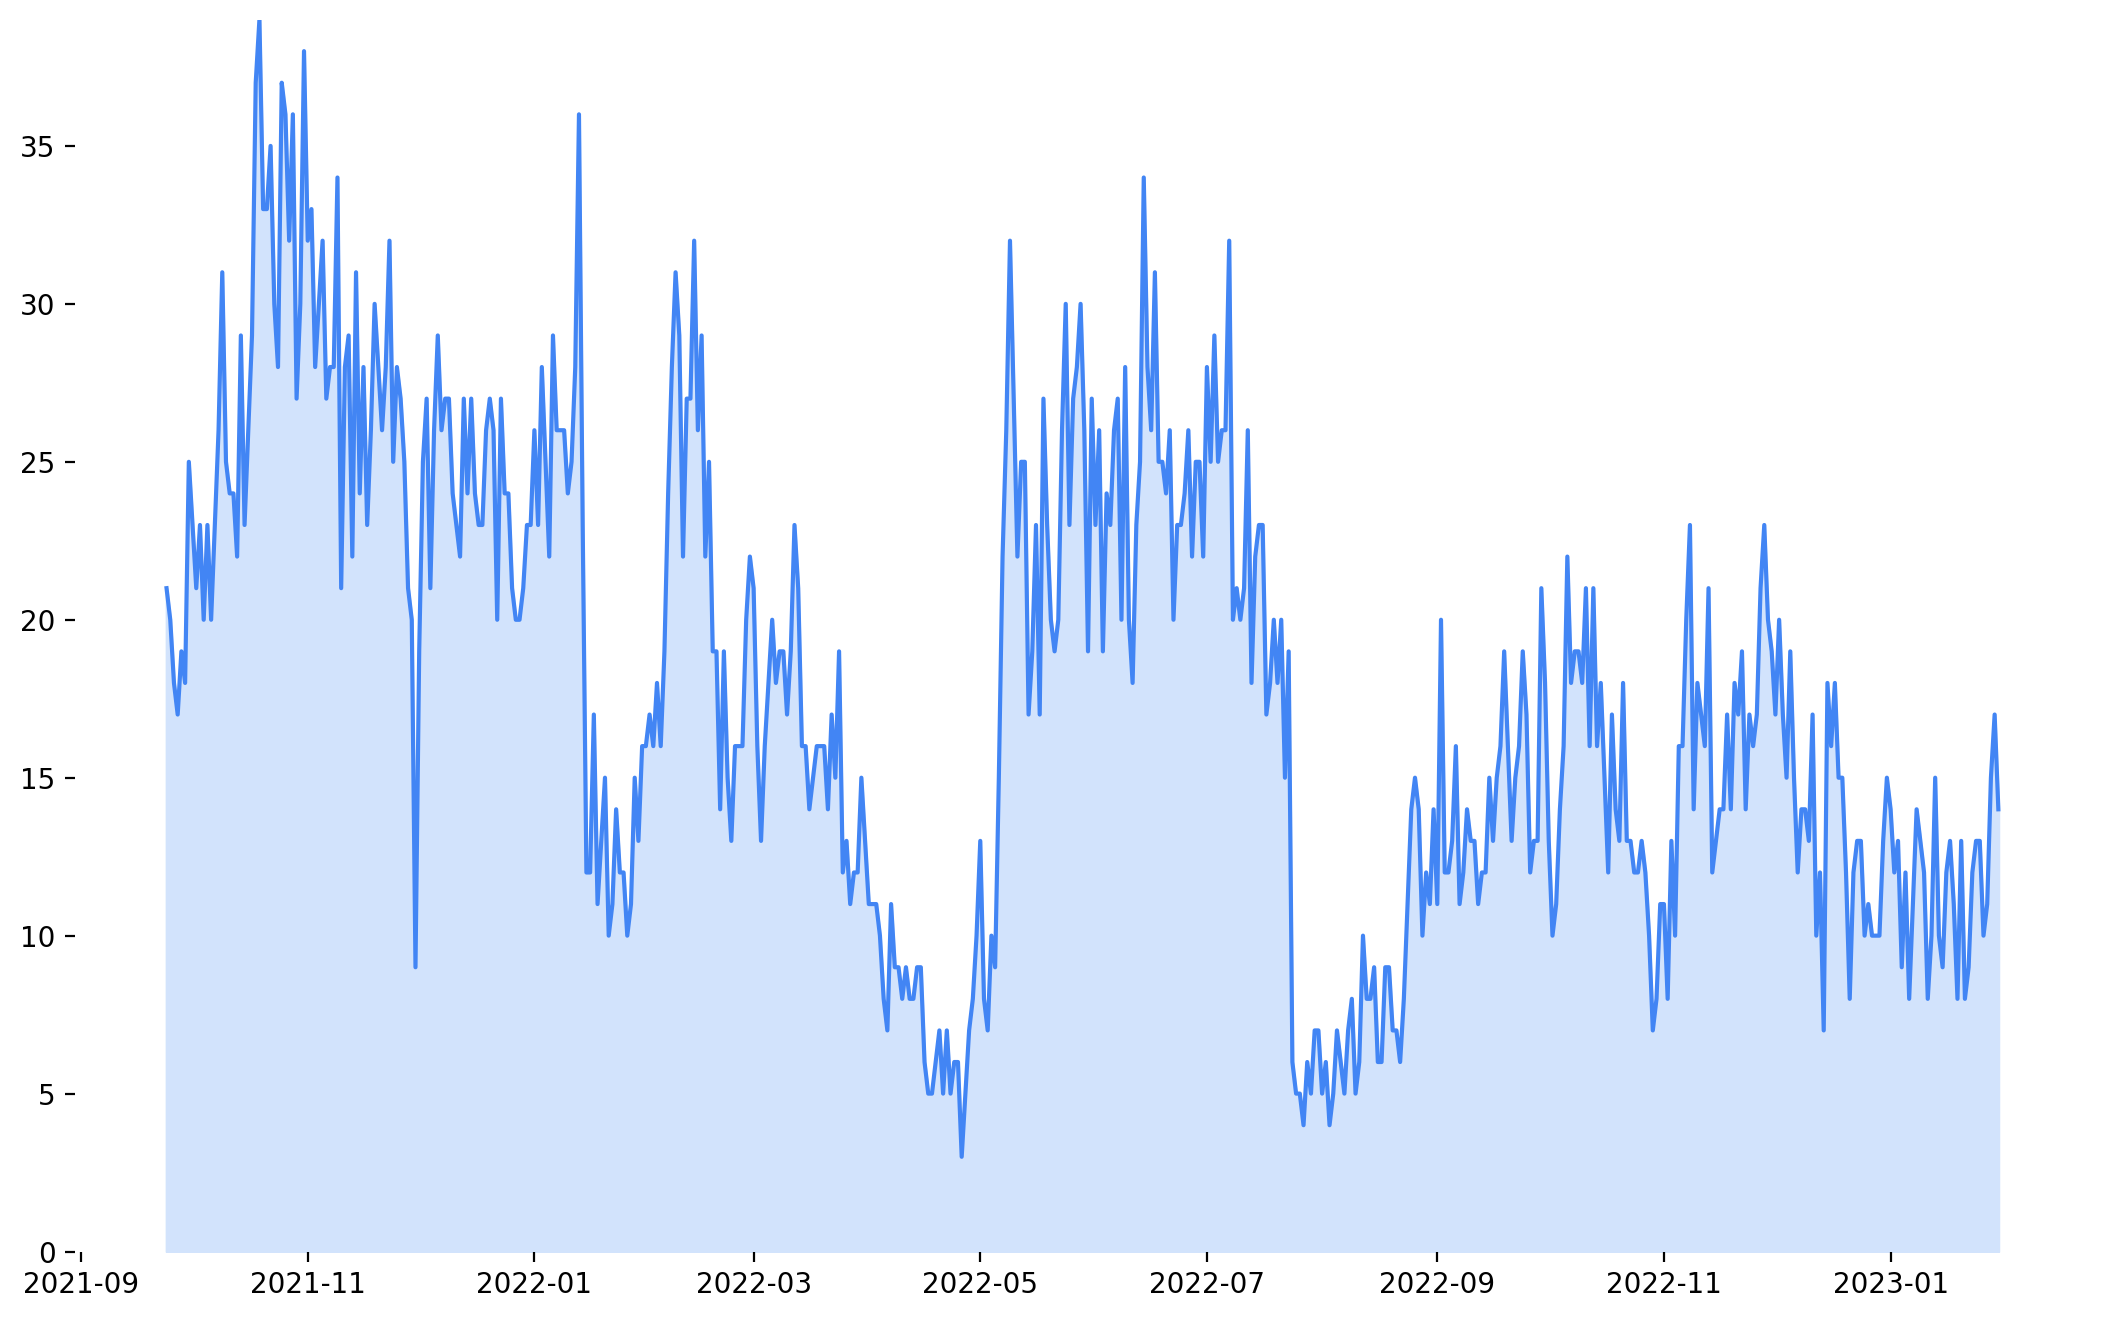

In [ ]:
#@title Target Variable Time Series 📸
from IPython.display import display
plt.rcdefaults()

#Increase quality & resolution for the chart to fit in a deck
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

plt.figure(figsize=(13,8))

# Same, but add a stronger line on top (edge)
plt.fill_between(y.index, y[kpi], color="#D2E3FC")
plt.plot(y.index, y[kpi], color="#4285F4")
plt.grid(False)

# Show the graph
max_target = y[kpi].max()
plt.ylim(0,max_target)
plt.rcParams['axes.facecolor']='white'

#Remove the spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# save the chart as a PNG file
fig.savefig('Target_variable_time_series.png')

plt.show()

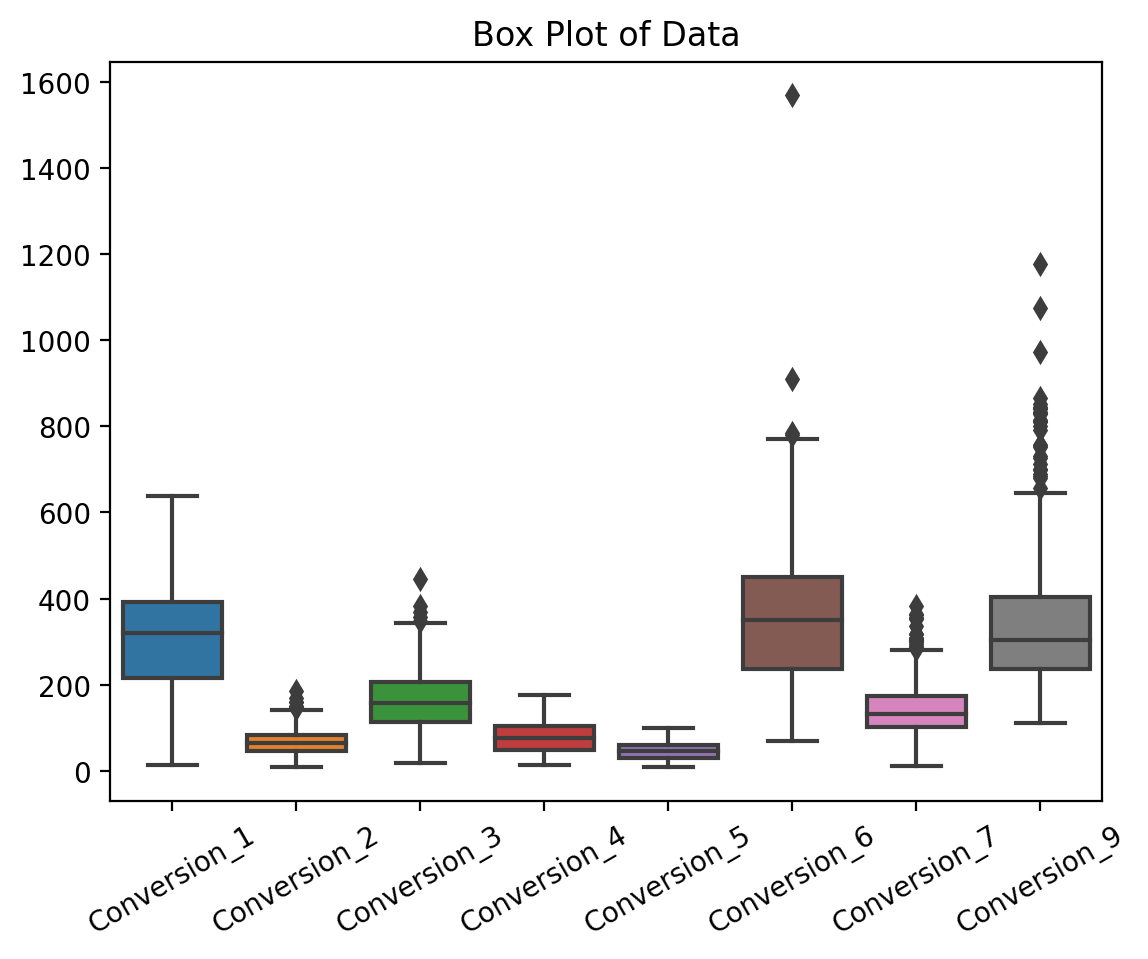

In [ ]:
#@title Outliers Box Plot 📸
import matplotlib.pyplot as plt

# Create a box plot of the data in the dataframe
ax = sns.boxplot(data=x)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Add a title
plt.title("Box Plot of Data")

# save the chart as a PNG file
fig.savefig('Box-plot.png')

# Display the chart
plt.show()

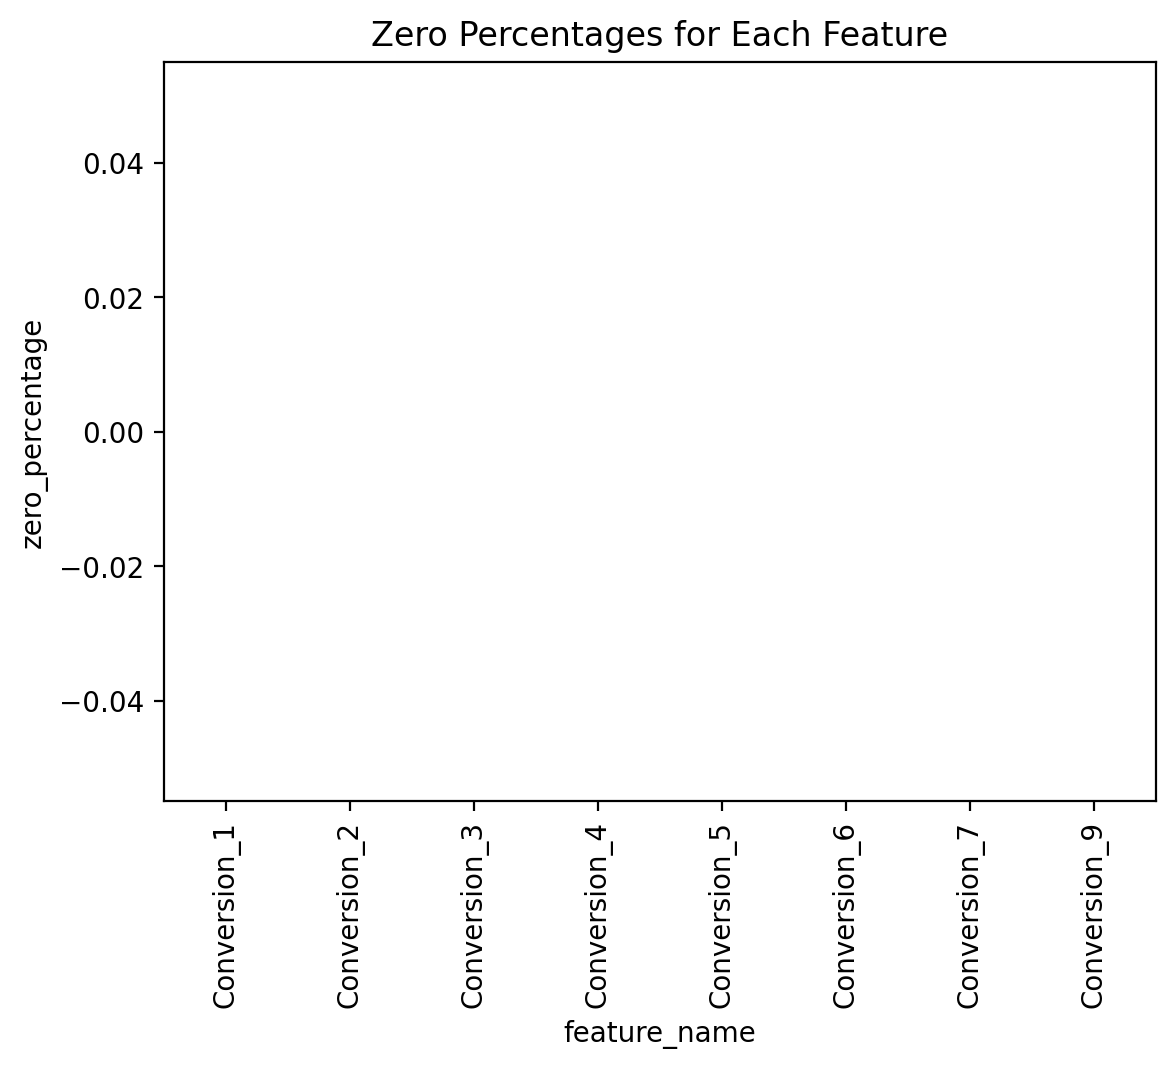

In [ ]:
#@title Zero-inflated columns 📸
zero_percentages = []
for i, col in enumerate(x.columns):
    zero_count = (x[col] == 0).sum()
    zero_percentage = (zero_count / x.shape[0]) * 100
    zero_percentages.append([col,zero_percentage])
df_zero_percentage = pd.DataFrame(zero_percentages,columns=["feature_name","zero_percentage"])

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='feature_name', y='zero_percentage', data=df_zero_percentage)
plt.title('Zero Percentages for Each Feature')
plt.xticks(rotation=90)

# save the chart as a PNG file
fig.savefig('Zero_columns.png')
plt.show()

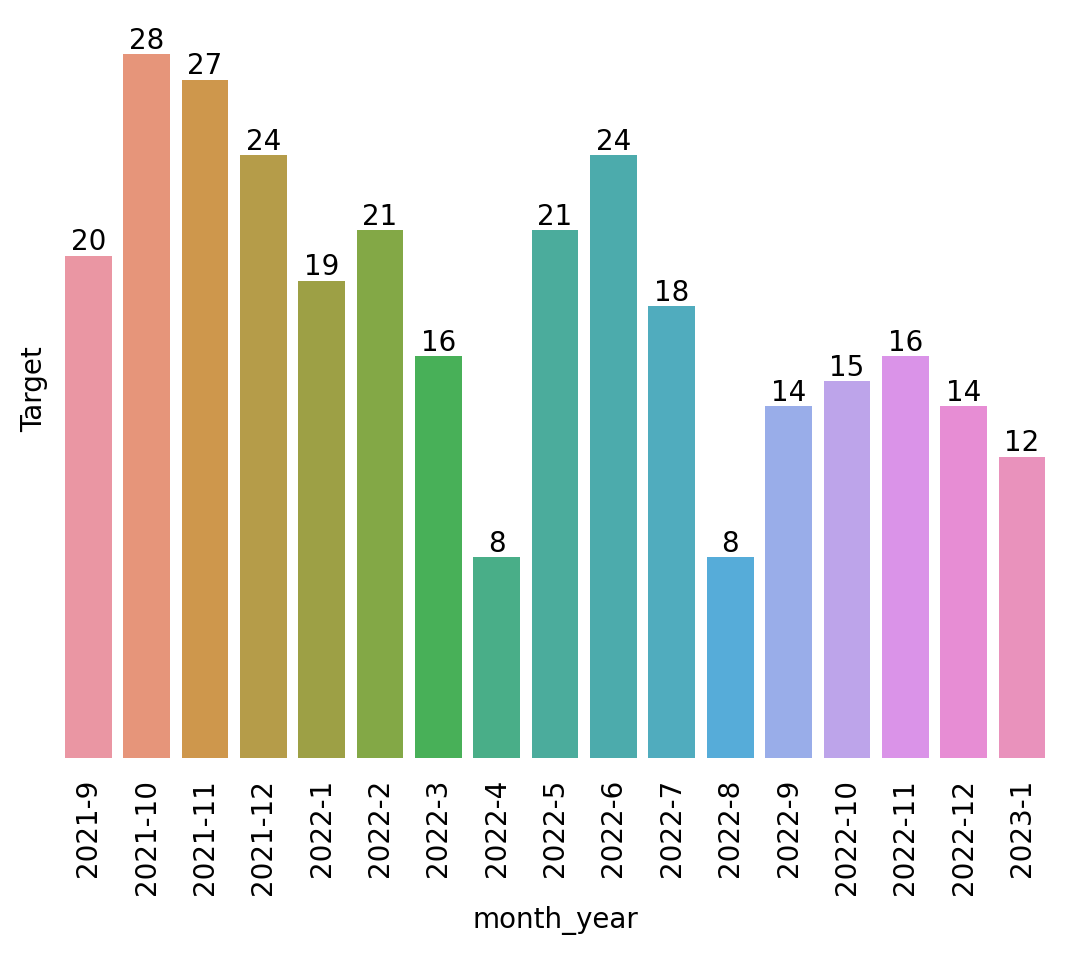

In [ ]:
#@title Target Variable Monthly Average (rounded to 0 decimals) by Month and Year 📸
import pandas as pd
import matplotlib.pyplot as plt

#Reset to default
plt.rcdefaults()

#Increase quality & resolution for the chart to fit in a deck
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

# assuming date is the index of the DataFrame and target variable is column 'y'
y = y
y['month'] = y.index.month  # extract month from index
y['year'] = y.index.year  # extract year from index
yearly_monthly_avg = y.groupby(['year', 'month']).mean()
yearly_monthly_avg = round(yearly_monthly_avg,0) # calculate yearly monthly average of y
yearly_monthly_avg['month_year'] = yearly_monthly_avg.index.map(lambda x: f"{x[0]}-{x[1]}")  # create new column with year-month string
yearly_monthly_avg.set_index('month_year', inplace=True)  # set year-month string as index
#bar1 = yearly_monthly_avg.plot.bar()

#pal = sns.color_palette("Blues",len(yearly_monthly_avg))
#rank = yearly_monthly_avg.sort_values(by=kpi, ascending = True).index

#colors above and below average line
#avg = round(yearly_monthly_avg.mean(),0)
#cols = ['red' if yearly_monthly_avg[x < avg] else 'green' for x in yearly_monthly_avg[kpi]]


#plot
splot=sns.barplot(x=yearly_monthly_avg.index,y= kpi, data=yearly_monthly_avg)

#Remove the spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Second, remove the ticks as well.
plt.tick_params(bottom=False, left=False, labelleft = False)

# Add label on top of each bar
plt.bar_label(splot.containers[0])

plt.xticks(rotation=90)

fig.savefig('Monthly_averages_target_variable.png')

plt.show()

y = y.drop(columns=['month', 'year'])


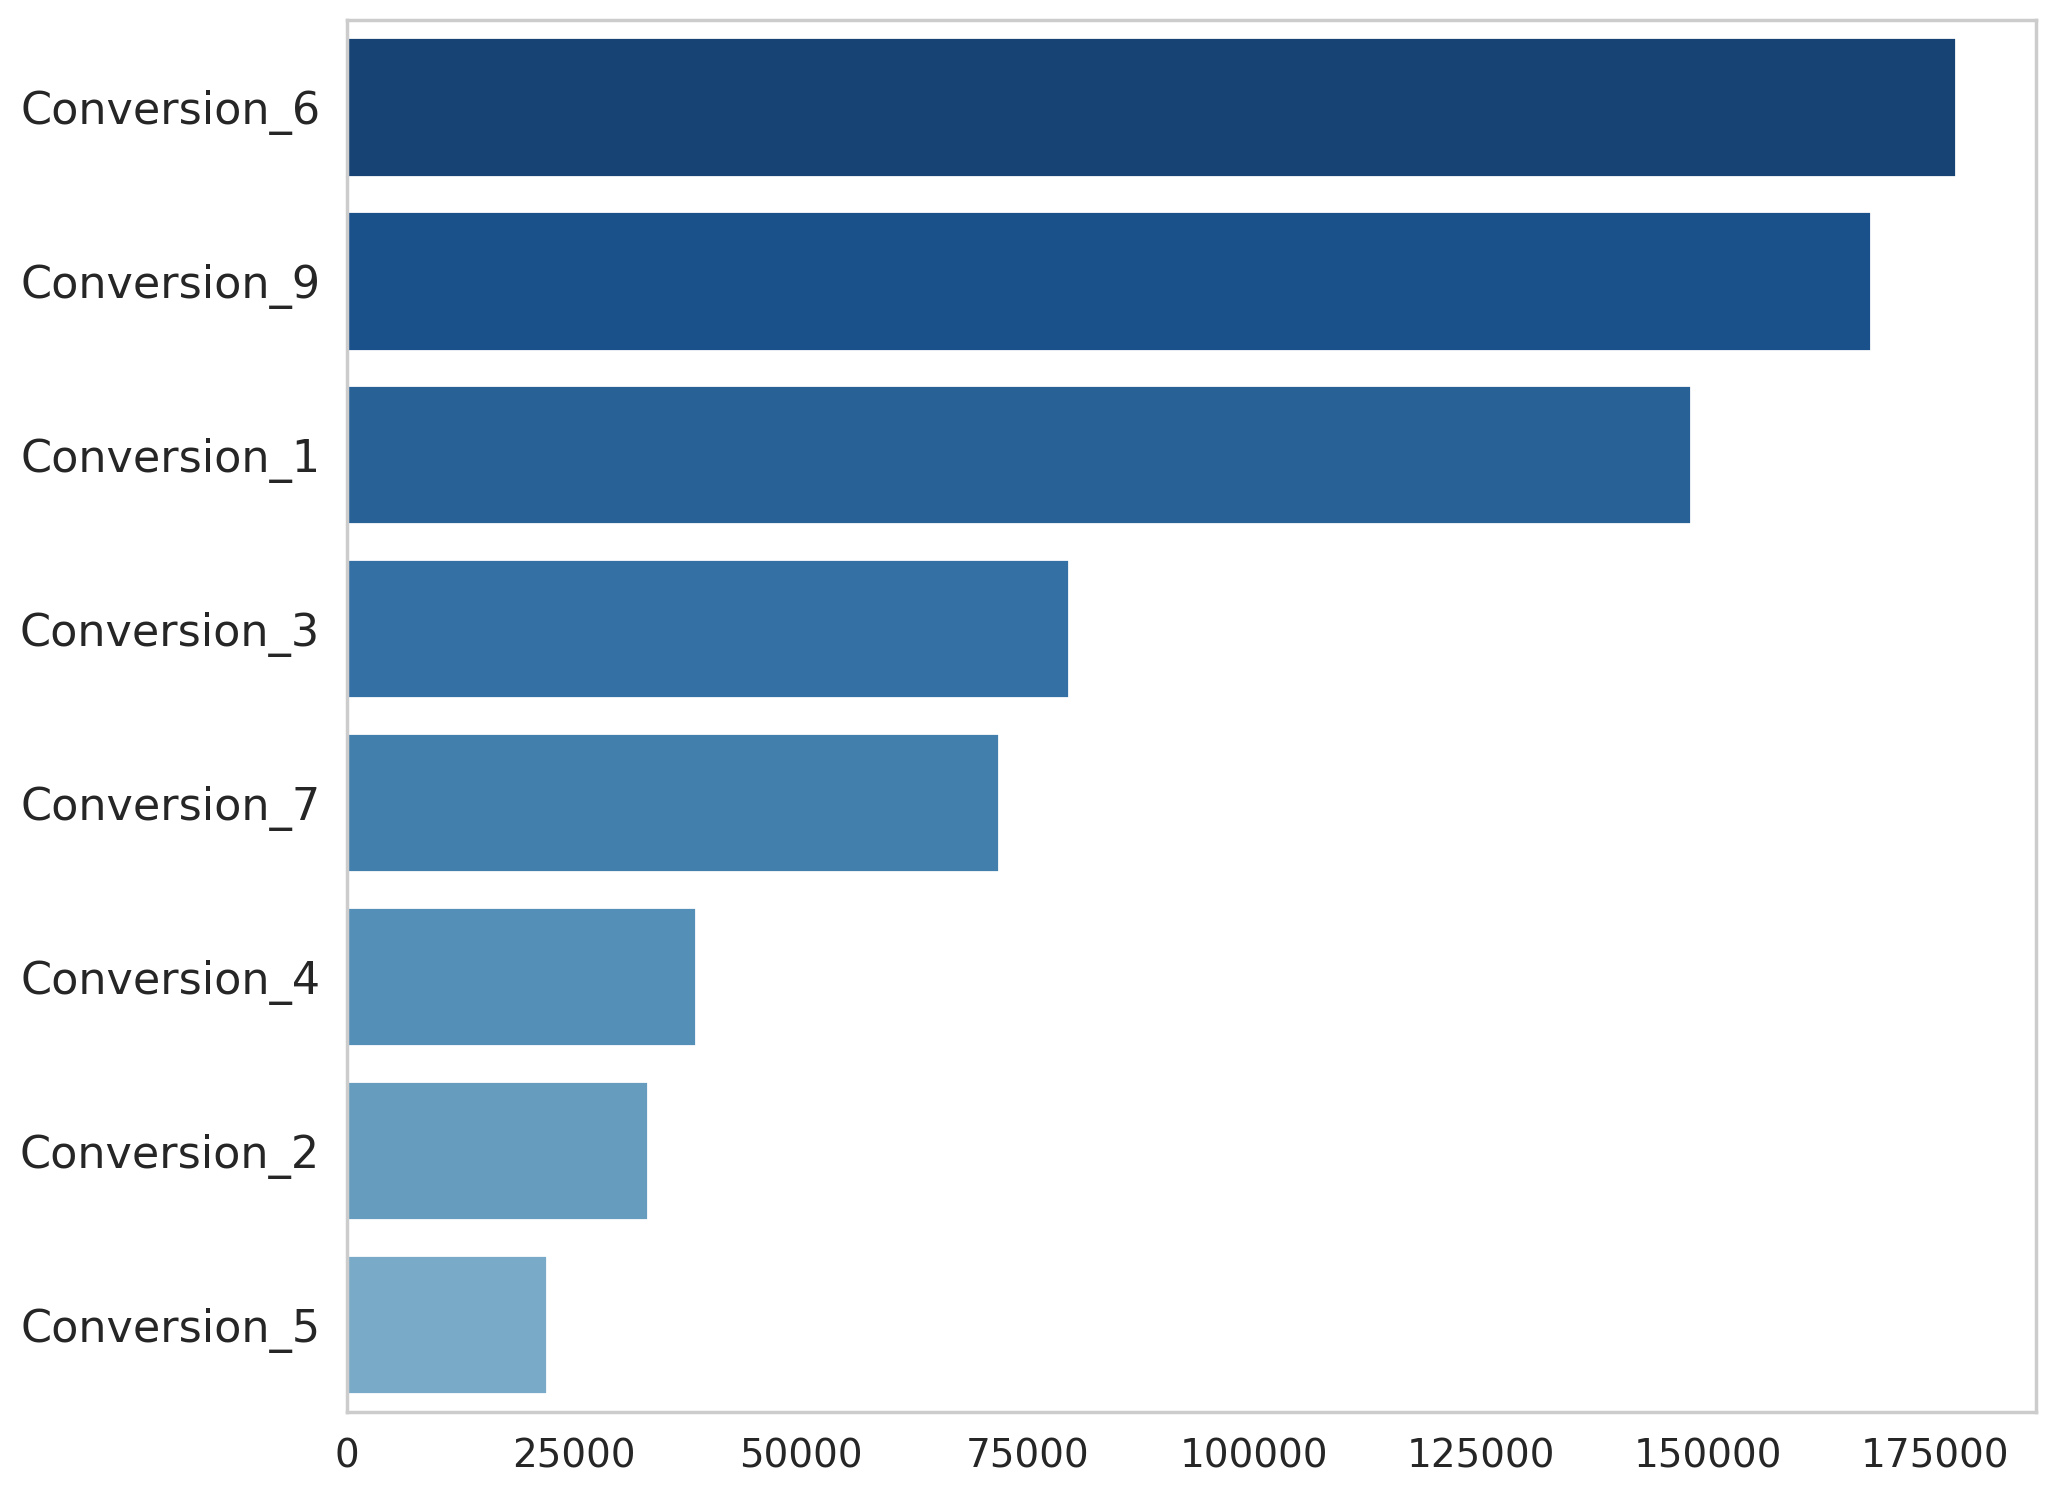

In [ ]:
#@title Input Variables Volume Bar Chart 📸
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the sum of values across each column
column_sums = x.sum()

# Sort the column sums in descending order
column_sums = column_sums.sort_values(ascending=False)

# Set font sizes
sns.set(font_scale=2)

# Set white background and remove gridlines
sns.set_style("whitegrid", {'axes.grid' : False})

# Create a bar chart of the column sums using seaborn
fig, ax = plt.subplots(figsize=(12, 8)) # Adjust the figure size
sns.barplot(x=column_sums.values, y=column_sums.index,orient='h', palette=sns.color_palette("Blues_r", 15), ax=ax)

# Adjust the font size of the y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

# Adjust the font size of the x-axis tick labels
plt.xticks(fontsize=14)

# Ensure tight layout to align the names on the x-axis
plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust the margins

# Save the chart to a PNG file that can be downloaded
plt.savefig('input_variables_sums.png', bbox_inches='tight')

# Show the plot
plt.show()



In [ ]:
#@title Volumes table
# Create a new DataFrame with column_sums
df_column_sums = pd.DataFrame({'Column': column_sums.index, 'Sum': column_sums.values})

# Add a new column for the average value per day
df_column_sums['Avg per Day/week'] = df_column_sums['Sum'] / df.shape[0]

# Sort the DataFrame by the 'Sum' column in descending order
df_column_sums = df_column_sums.sort_values(by='Sum', ascending=False)

# Display the DataFrame
print(df_column_sums)

         Column     Sum  Avg per Day/week
0  Conversion_6  177270        358.846154
1  Conversion_9  167973        340.026316
2  Conversion_1  148085        299.767206
3  Conversion_3   79564        161.060729
4  Conversion_7   71861        145.467611
5  Conversion_4   38543         78.022267
6  Conversion_2   33222         67.251012
7  Conversion_5   22030         44.595142


## Step 3: Feature Engineering & Selection

In [ ]:
#@title Outlier Clipping
# Define your function to clip outliers
def clip_outliers(X_train, clip_outliers):
    if clip_outliers == 'yes':
        # Calculate the 1st and 3rd quartiles and interquartile range for each column
        q1 = X_train.quantile(0.25)
        q3 = X_train.quantile(0.75)
        iqr = q3 - q1

        # Calculate the upper and lower bounds for each column based on the box plot logic
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        # Clip values that fall outside the bounds for each column
        for col in X_train.columns:
            X_train[col] = np.clip(X_train[col], lower_bound[col], upper_bound[col])

    return X_train

# Call the function and print the results
X_train = clip_outliers(X_train, clip_outliers)

### Lagged variables

In [ ]:
#@title Lagged Variables
#@markdown What are lagged variables? For example, if Xt is the independent variable, then Xt-1 will be a lagged dependent variable with a lag of one period. Lagged values are used in Dynamic Regression modeling. Especially in the Auto Industry, lagged variables are important due to the long purchase cycle and therefore time component between actions.

#Lag Variables
x=x.sort_index(axis=0)
X_train=X_train.sort_index(axis=0)
X_test=X_test.sort_index(axis=0)



In [ ]:
#@title Apply lags
def transformation(dataframe,x):
#Apply lags to test long-term impact of actions on kpi
    lag = []
    for i in range(1, max_lag, 1):
        data = dataframe[x].shift(i).to_frame()
        data.columns = [col_name+'<>Lag'+str(i)for col_name in data.columns]
        # store DataFrame in list
        lag.append(data)
    # see pd.concat documentation for more info
    lag = pd.concat(lag,axis=1)
    lag=lag.fillna(0)
    return lag

In [ ]:
#@title Add the lagged variables to the dataframe
for i in X_train.columns:
  transformed_features = transformation(X_train,i)
  X_train = pd.concat([X_train, transformed_features], axis = 1)

for i in X_test.columns:
  transformed_features = transformation(X_test,i)
  X_test = pd.concat([X_test, transformed_features], axis = 1)

for i in x.columns:
  transformed_features = transformation(x,i)
  x = pd.concat([x, transformed_features], axis = 1)

In [ ]:
#@title Examine correlation of lagged feature variables against Sales
'''
Examine correlation of lagged feature variables against Sales
'''

pd.set_option('display.max_rows', None)
correlations_df = X_train
correlations_df['y'] = y_train
lag_correlations = pd.DataFrame(correlations_df.corr()['y'].round(2))
df_melt = lag_correlations.reset_index().melt(id_vars='index', value_vars='y',value_name='correlation')
df_melt.columns = ['feature','lag','correlation']
df_pivot = df_melt.pivot(index='feature',columns='lag',values='correlation')

df_pivot['original HVA'], df_pivot['lag value'] = zip(*df_pivot.index.str.split("<>", n=1, expand=True))
df_pivot['lag value'].fillna("Lag0", inplace=True)
df_pivot['lag value'] = df_pivot['lag value'].str.extract("(\d+)", expand=False).astype(int)

# group by original HVA and find the max y value for each group
df_grouped = df_pivot.groupby('original HVA')['y'].idxmax().reset_index(drop=True)

# select the rows in df_pivot with the maximum y value for each group
df_result = df_pivot.loc[df_grouped]

selected_features_names = df_result.index.drop('y').tolist()

# Convert the list elements to strings with single inverted comma
selected_features_names = [f'{name}' for name in selected_features_names]

X_train.drop(columns = ['y'], inplace = True)

selected_features = X_train.loc[:, selected_features_names]

X_test = X_test.loc[:, selected_features_names]

x = x.loc[:, selected_features_names]


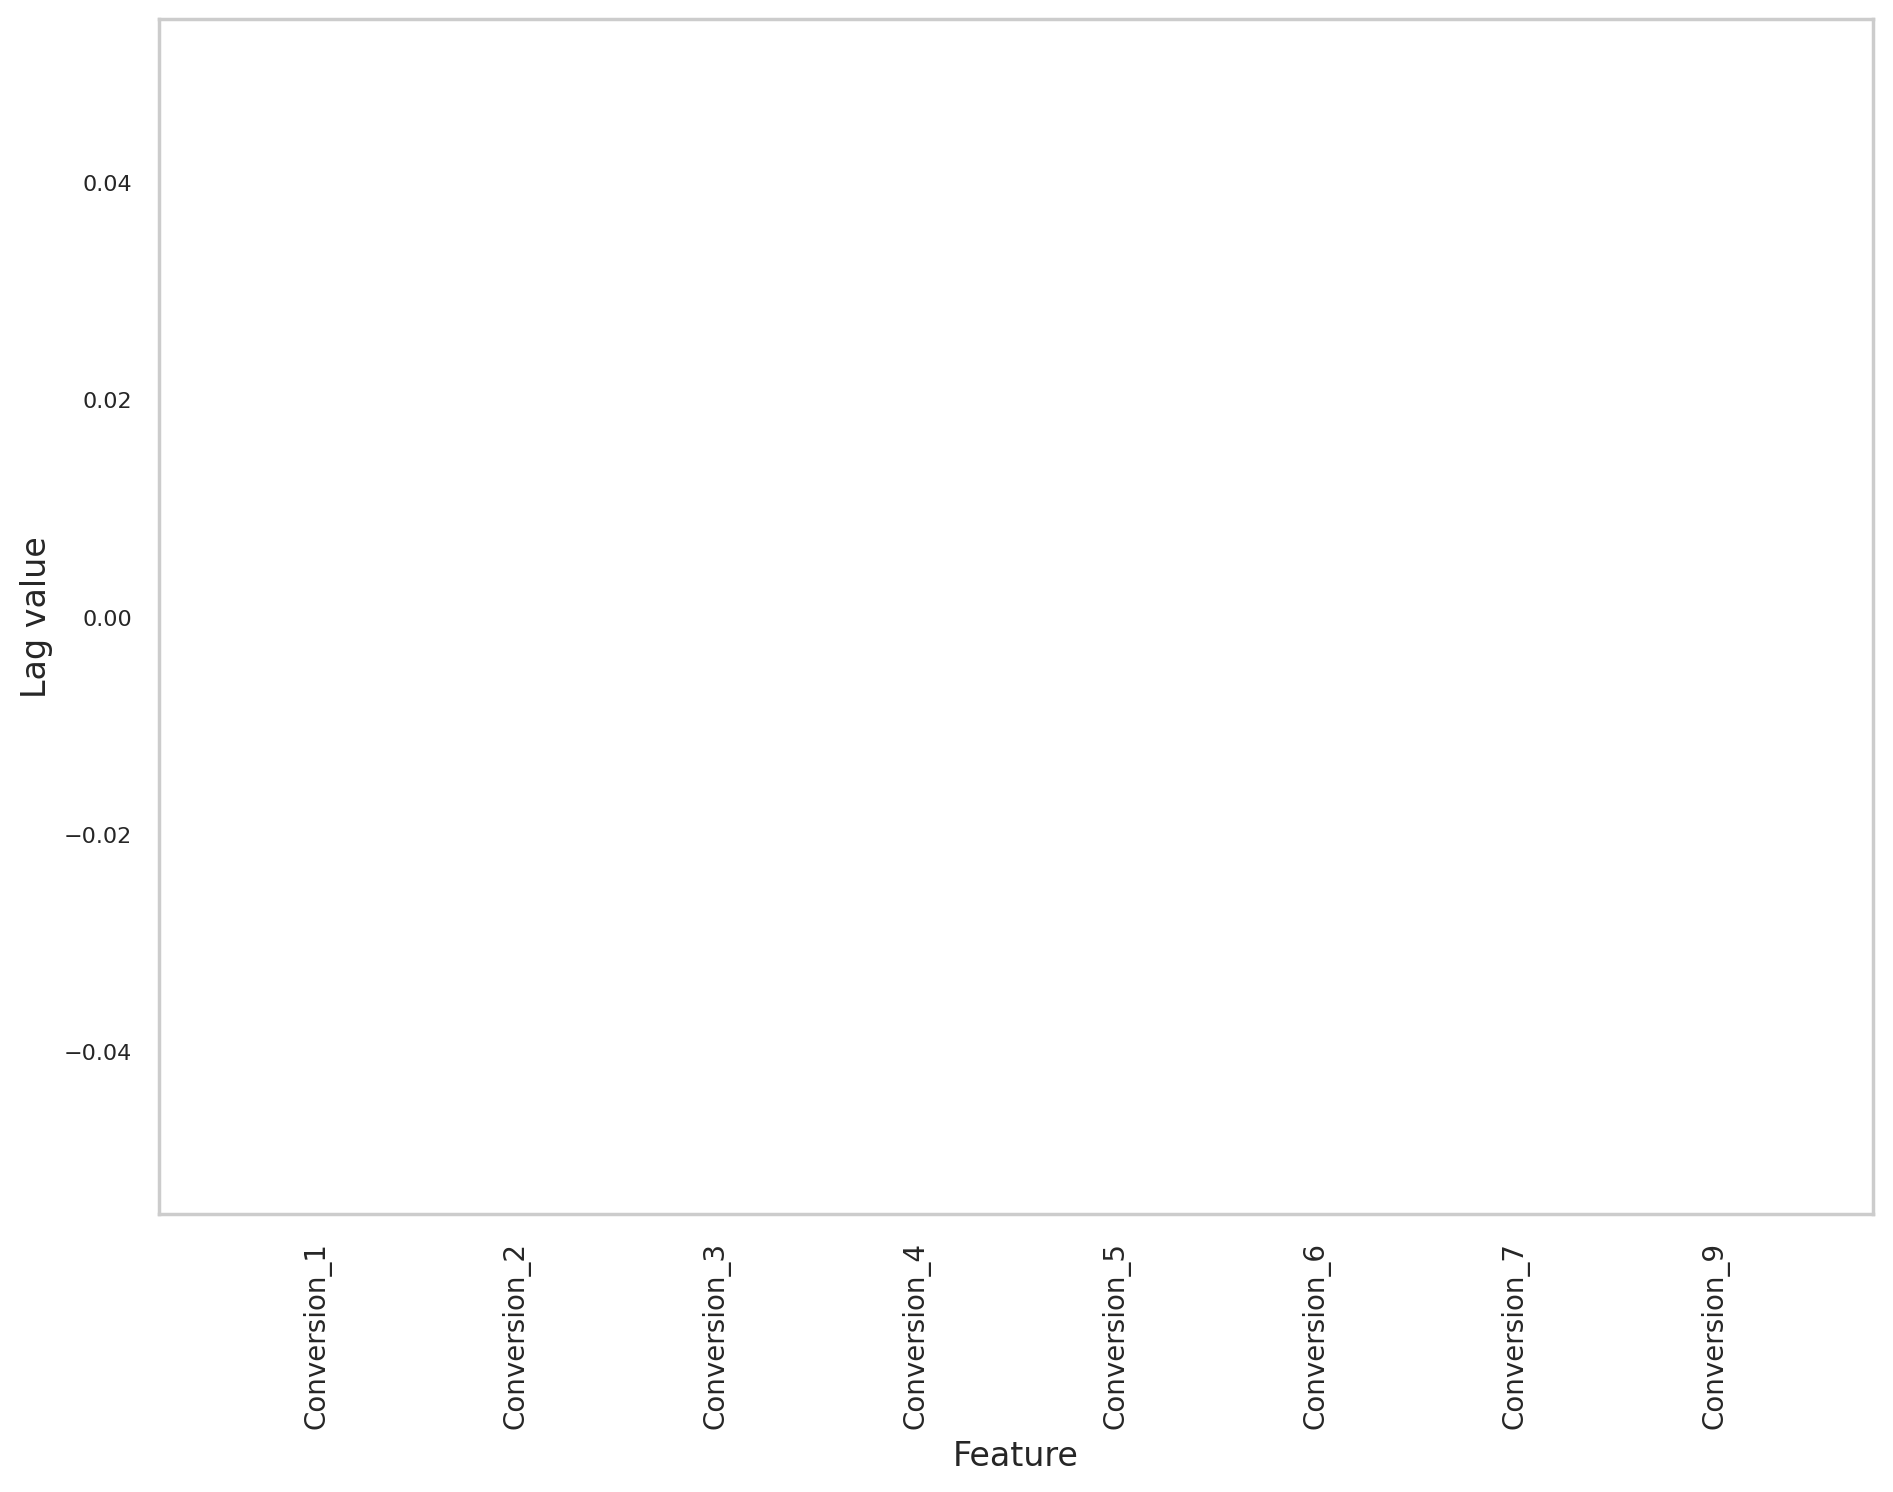

<Figure size 640x480 with 0 Axes>

In [ ]:
#@title Plot the Lag of each feature 📸
import pandas as pd
import matplotlib.pyplot as plt

# extract columns "original HVA" and "lag value" from df_result
df1 = df_result[["original HVA", "lag value"]]

# group by "original HVA" and sort by descending order of "lag value"
df1 = df1.groupby("original HVA").max().sort_values(by="lag value", ascending=False)

# drop entry called 'y' from the data frame
df1 = df1.drop("y", axis=0)

# set the figure size
plt.figure(figsize=(10, 8))

# plot bar chart with color #4285F4
plt.bar(df1.index, df1["lag value"], color="#4285F4")

# rotate x-axis tick labels by 90 degrees and adjust font size
plt.xticks(rotation=90, fontsize=8)

# set x-axis label and adjust font size
plt.xlabel("Feature", fontsize=12)

# set y-axis label and adjust font size
plt.ylabel("Lag value", fontsize=12)

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=8)

# Adjust the font size of the x-axis tick labels
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()
plt.savefig("website_actions_lag_values.png", bbox_inches="tight")


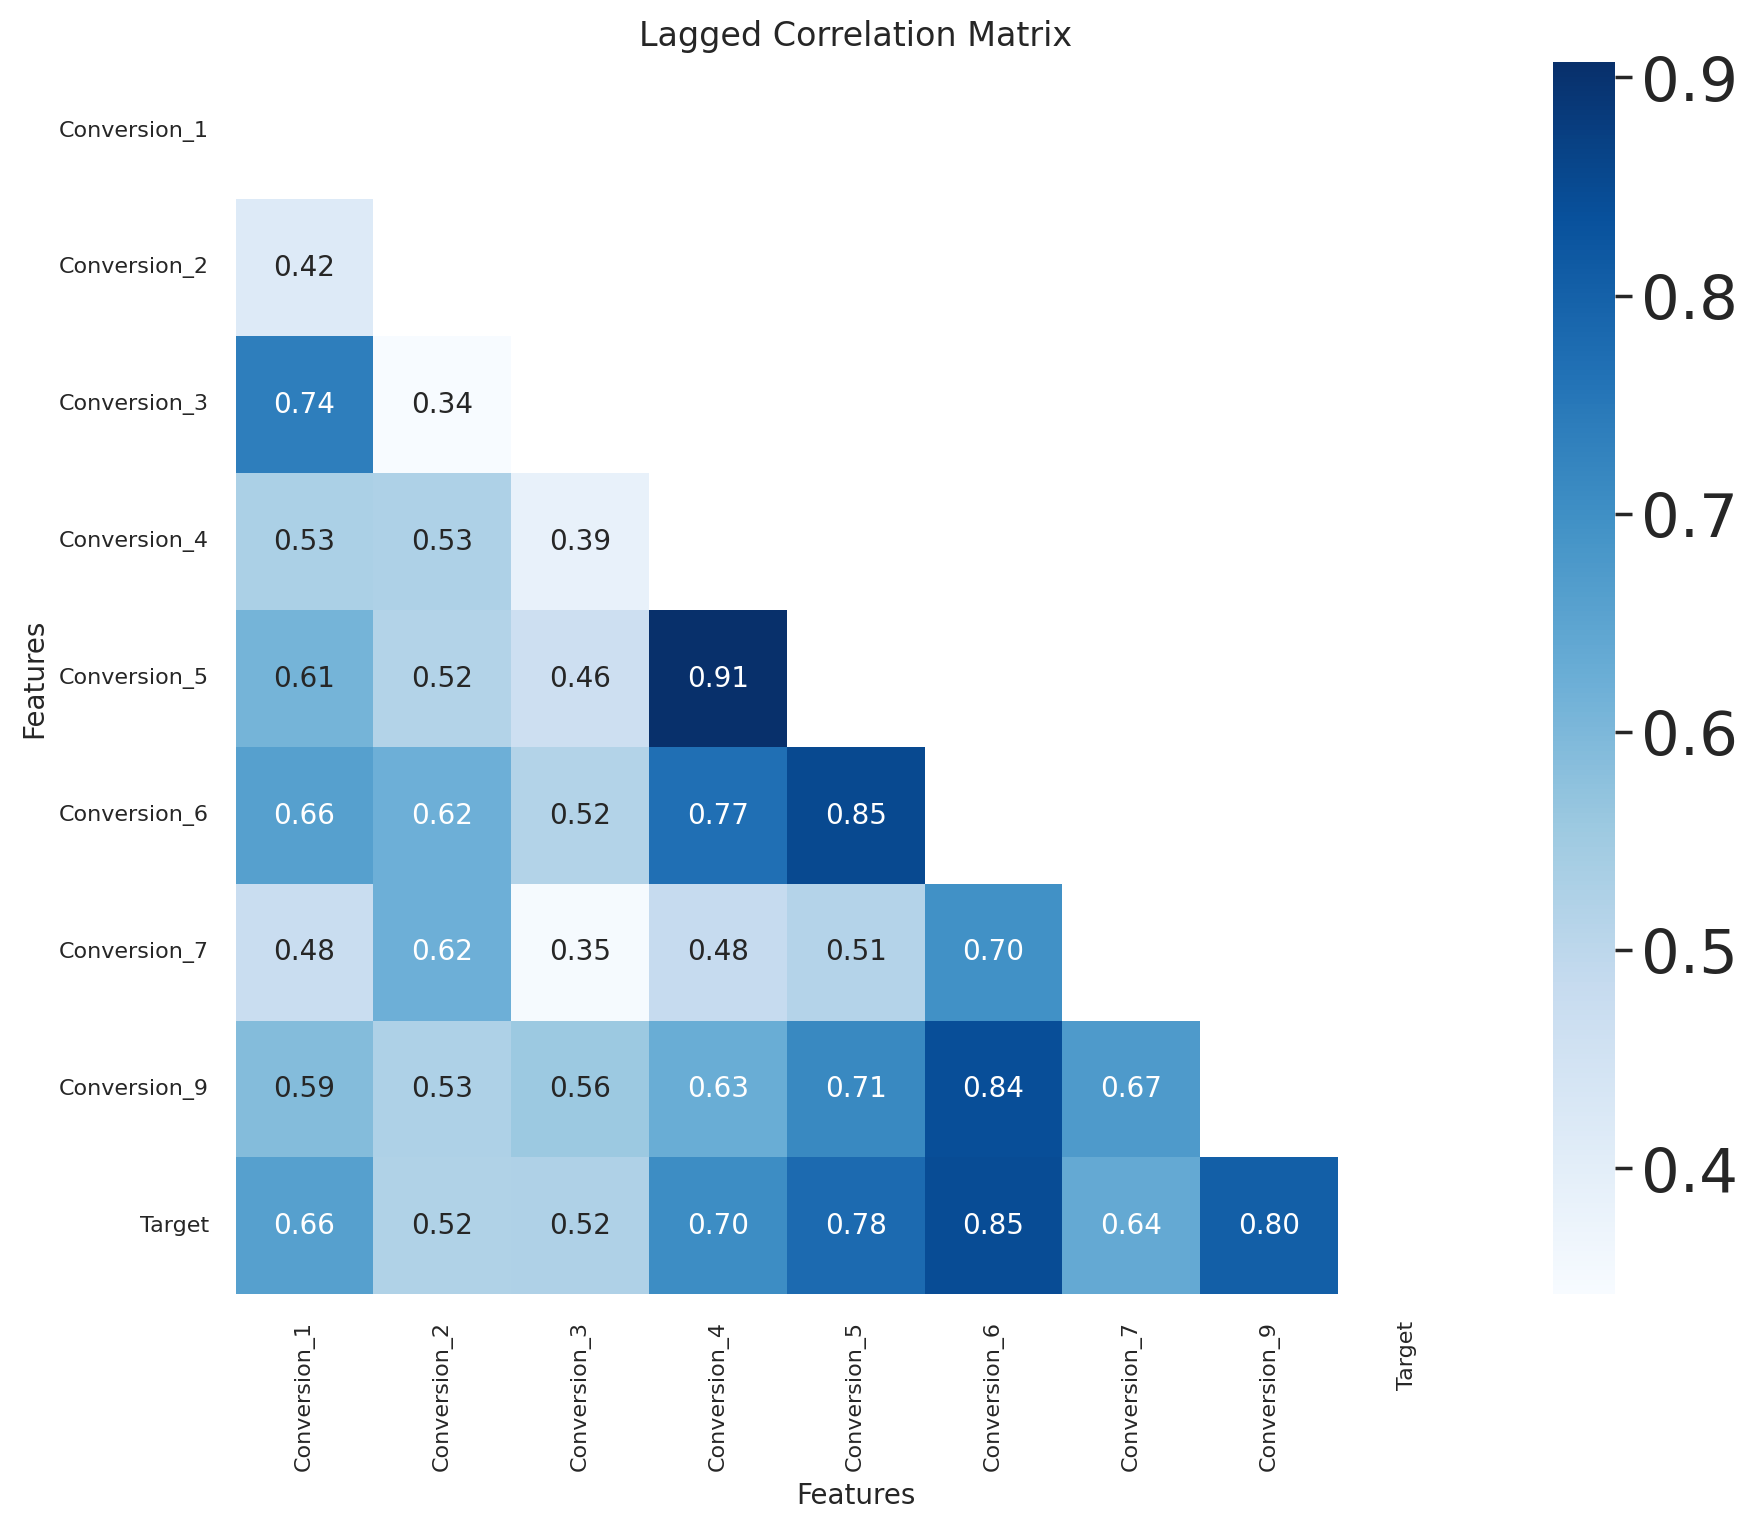

In [ ]:
#@title Plot the Lagged correlation matrix 📸
df_corr = selected_features.merge(y, left_index = True, right_on='Date')

correl = df_corr.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(correl)

plt.figure(figsize=(10, 8))

# using the upper triangle matrix as mask
sns.heatmap(correl, mask=matrix, annot=True, cmap='Blues', fmt='.2f', annot_kws={"size": 10})

plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=8)

# Adjust the font size of the x-axis tick labels
plt.xticks(fontsize=8)

plt.title('Lagged Correlation Matrix', fontsize=12)

plt.savefig("lagged_corr_matrix.png", bbox_inches="tight")

In [ ]:
#@title Scaling the input dataset
from sklearn import preprocessing

# Assuming selected_features and X_test are your training and test data

# Fit the scaler on the training data
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(selected_features.values)

# Scale the training data and create a new dataframe with the same column names
selected_features_scaled = pd.DataFrame(standard_scaler.transform(selected_features.values), columns=selected_features.columns, index=selected_features.index)

# Scale the test data in-place
X_test.loc[:,:] = standard_scaler.transform(X_test.values)

# Scale the overall data in-place
x.loc[:,:] = standard_scaler.transform(x.values)







In [ ]:
#@title Multi-collinearity check (VIF)

vif = add_constant(selected_features_scaled)

# loop to calculate the VIF for each X
vif = pd.Series([variance_inflation_factor(vif.values, i)
      for i in range(vif.shape[1])],
      index=vif.columns)

# processing to output VIF results as a dataframe
vif_df=vif.to_frame().reset_index()

vif_df.columns = ['feature', 'vif']
vif_df=vif_df.replace([np.inf], np.nan) # replace inf calculations as missing and zero fill
vif_df=vif_df.fillna(0).sort_values(by="vif", ascending=False)
vif_df.loc[vif_df['feature'] == 'const', 'vif'] = 1
vif_df = vif_df.sort_values('vif', ascending=False)
vif_df.reset_index(inplace = True)



high_collinearity_columns = vif_df.feature[vif_df['vif'] >= vif_threshold].to_list()
high_collinearity_columns

vif_df.loc[vif_df['feature'] == 'const', 'vif'] = 1
vif_df = vif_df.sort_values('vif', ascending=False)
cols_to_drop = []
while vif_df.vif[0] >= vif_threshold:
  if vif_df.vif[0] >= vif_threshold:
    cols_to_drop.append(vif_df.feature[0])
    vif_df.loc[vif_df['feature'] == 'const', 'vif'] = 1
    vif_df = vif_df.sort_values('vif', ascending=False)
    selected_features_scaled.drop(columns = vif_df.feature[0],inplace = True)
    X_test.drop(columns = vif_df.feature[0],inplace = True)
    x.drop(columns = vif_df.feature[0],inplace = True)
    vif = add_constant(selected_features_scaled)
  # loop to calculate the VIF for each X
    vif = pd.Series([variance_inflation_factor(vif.values, i)
    for i in range(vif.shape[1])], index=vif.columns)
    # processing to output VIF results as a dataframe
    vif_df=vif.to_frame().reset_index()
    vif_df.columns = ['feature', 'vif']
    vif_df=vif_df.replace([np.inf], np.nan) # replace inf calculations as missing and zero fill
    vif_df.loc[vif_df['feature'] == 'const', 'vif'] = 1
    vif_df=vif_df.fillna(0).sort_values(by="vif", ascending=False)
    vif_df.reset_index(inplace = True)

##Step 4: Model building & Visualization

### Preparing the final dataset

In [ ]:
#@title Trimming for max_lag in the dataset
max_lag2 = df_pivot['lag value'].max()

In [ ]:
#@title Splitting our input and output datasets
final_df = selected_features_scaled
final_df['Date'] = final_df.index
final_df['Target'] = y
final_df = final_df[max_lag2:]

plt.rcParams['figure.figsize'] = [20, 10]

df = final_df

# Reset the index to the date and drop the duplicative column
df = df.set_index(df['Date'])
df = df.drop(columns = ['Date'])


In [ ]:
#@title Defining the test and train input datasets and the output 'y' variable
kpi = 'Target'
y_train = df[df.columns[df.columns == kpi]]
X_train = df[df.columns[df.columns != kpi]]

### The Linear Model run

In [ ]:
#@title OLS Model Run #1
import statsmodels.api as sm
from sklearn.metrics import r2_score

# add a column of ones to the training data for the intercept term
X_train = sm.add_constant(X_train)

# create the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# perform backward elimination
while True:
    # check the p-values of the remaining coefficients
    remaining_vars = X_train.columns[1:] # exclude the intercept term
    p_values = results.pvalues.loc[remaining_vars]
    max_p = p_values.max()

    # check if any p-value is above p_value_threshold defined earliear
    if max_p > p_value_threshold:
        # drop the variable with the highest p-value
        drop_var = p_values.idxmax()
        X_train = X_train.drop(drop_var, axis=1)
        print(f"Dropped variable '{drop_var}' with p-value {max_p:.4f}")

        # also drop the variable from X_test
        X_test = X_test.drop(drop_var, axis=1)

        # also drop the variable from x
        x = x.drop(drop_var, axis=1)

        # fit the model to the updated data
        model = sm.OLS(y_train, X_train)
        results = model.fit()

    else:
        # all p-values are below threshold, break out of the loop
        break

# print a summary of the model's statistical properties
print(results.summary())

# align the columns of X_test with X_train
#X_test = X_test.reindex(columns=X_train.columns)

# add a column of ones to the test data for the intercept term
X_test = sm.add_constant(X_test)

# predict the results
y_pred = results.predict(X_test)

# Sort y_test by date time index
y_test = y_test.sort_index()

# Sort y_pred by date time index
y_pred = y_pred.sort_index()

# calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print("Final test R-squared value is", r2)



Dropped variable 'Conversion_2' with p-value 0.9714
Dropped variable 'Conversion_7' with p-value 0.6599
Dropped variable 'Conversion_3' with p-value 0.1326
                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     311.7
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          2.69e-113
Time:                        15:09:29   Log-Likelihood:                -912.94
No. Observations:                 351   AIC:                             1836.
Df Residuals:                     346   BIC:                             1855.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|

In [ ]:
#@title Running the OLS model on the complete dataset

# Drop insignificant features, re-run, and check fit

x = sm.add_constant(x)

linear_model = sm.OLS(y,x).fit()
predictions = linear_model.predict(x)
model_summary = linear_model.summary()
print(model_summary)



                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     377.7
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          5.22e-148
Time:                        15:09:29   Log-Likelihood:                -1350.7
No. Observations:                 494   AIC:                             2711.
Df Residuals:                     489   BIC:                             2733.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.9712      0.169    106.636   

### Linear Model Outputs

              Coefficients
Conversion_1      1.339289
Conversion_4      1.583368
Conversion_6      1.733998
Conversion_9      2.491705


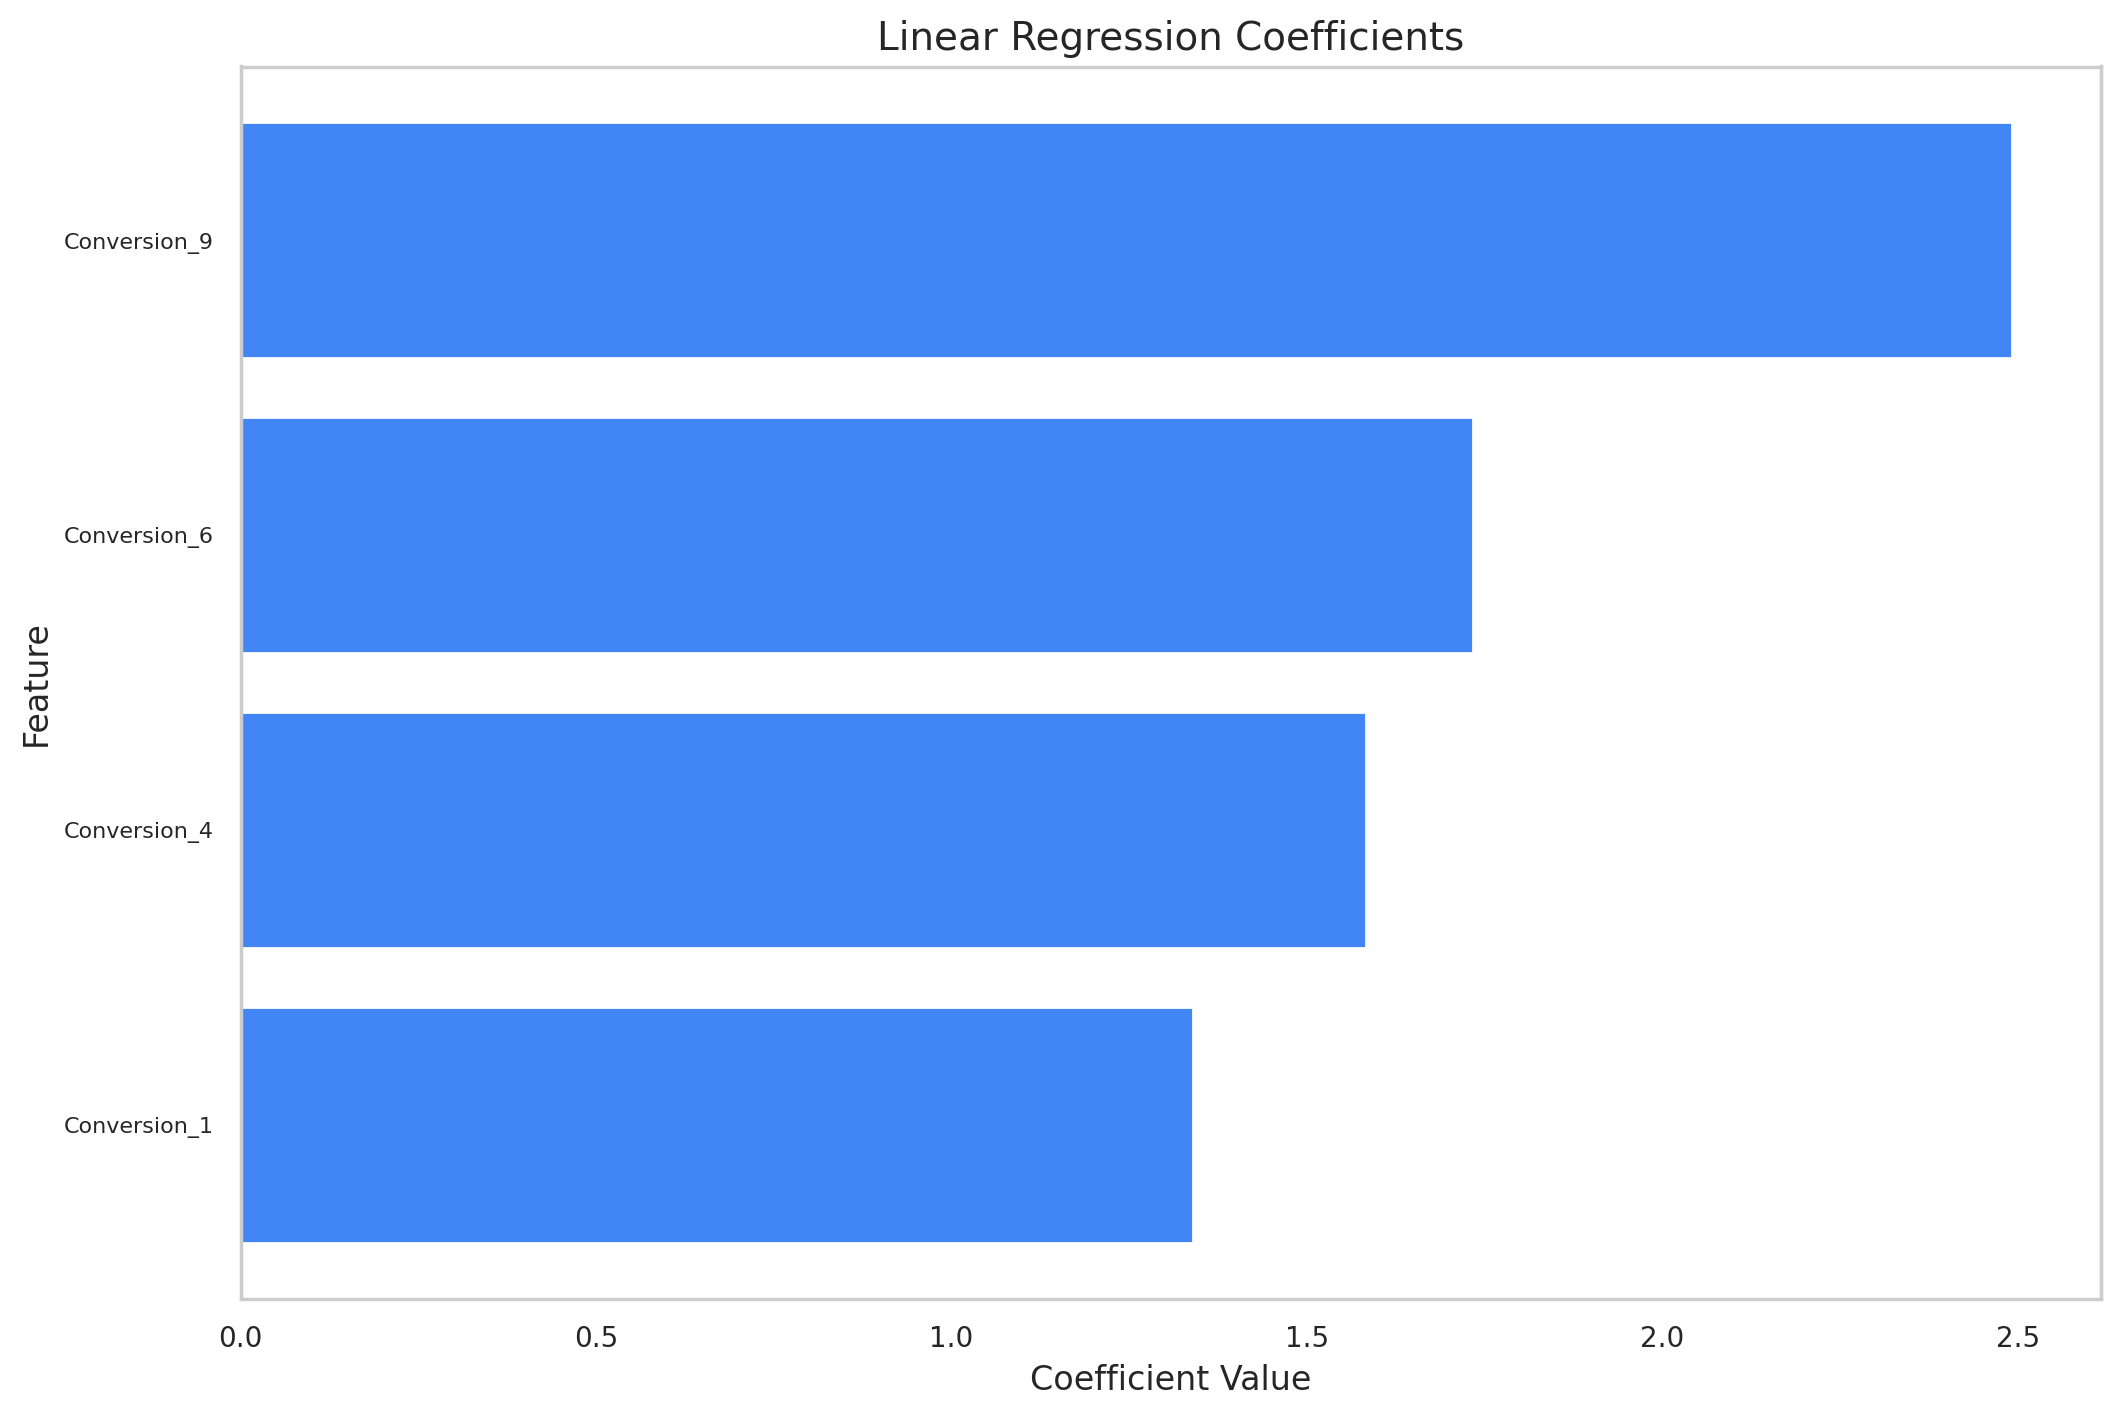

In [ ]:
#@title Print & plot coefficients
# print coefficients in normal numeric format vs. scientific
# extract coefficients
coefficients = pd.DataFrame(linear_model.params, columns=['Coefficients'])

coefficients = coefficients.drop('const')
print(coefficients)

# plot coefficients as horizontal bars
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(coefficients.index, coefficients['Coefficients'], align='center', color='#4285F4')
ax.set_xlabel('Coefficient Value', fontsize = 12)
ax.set_ylabel('Feature', fontsize = 12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=8)
ax.set_title('Linear Regression Coefficients', fontsize=14)
plt.show()

In [ ]:
#@title Plot predicted versus actual values 📸
results = pd.DataFrame()
results['actual'] = y
results['predicted'] = predictions

results.sort_index()

fig = px.line(results.sort_index())
fig.show()

In [ ]:
#@title Get the relative importance of each input feature
x.drop(columns = 'const',inplace = True)

import pandas as pd

# concatenate X_train and X_test vertically
X_concatenated = pd.concat([X_train, X_test], axis=0)

# concatenate y_train and y_test vertically
y_concatenated = pd.concat([y_train, y_test], axis=0)

# merge X_concatenated and y_concatenated horizontally
df_rel_imp = pd.concat([X_concatenated, y_concatenated], axis=1)

#select all variables of interest for the final model and attribution read out
yName = 'Target' #update target variable name
xNames = x.columns.to_list() #update with all x variables to include

df_results = relativeImp(df_rel_imp, outcomeName = yName, driverNames = xNames)

df_results.sort_values(by = 'rawRelaImpt', ascending = False)

,driver,rawRelaImpt,normRelaImpt
3,Conversion_9,0.235427,30.812971
2,Conversion_6,0.180465,23.619510
1,Conversion_4,0.177898,23.283458
0,Conversion_1,0.170262,22.284061


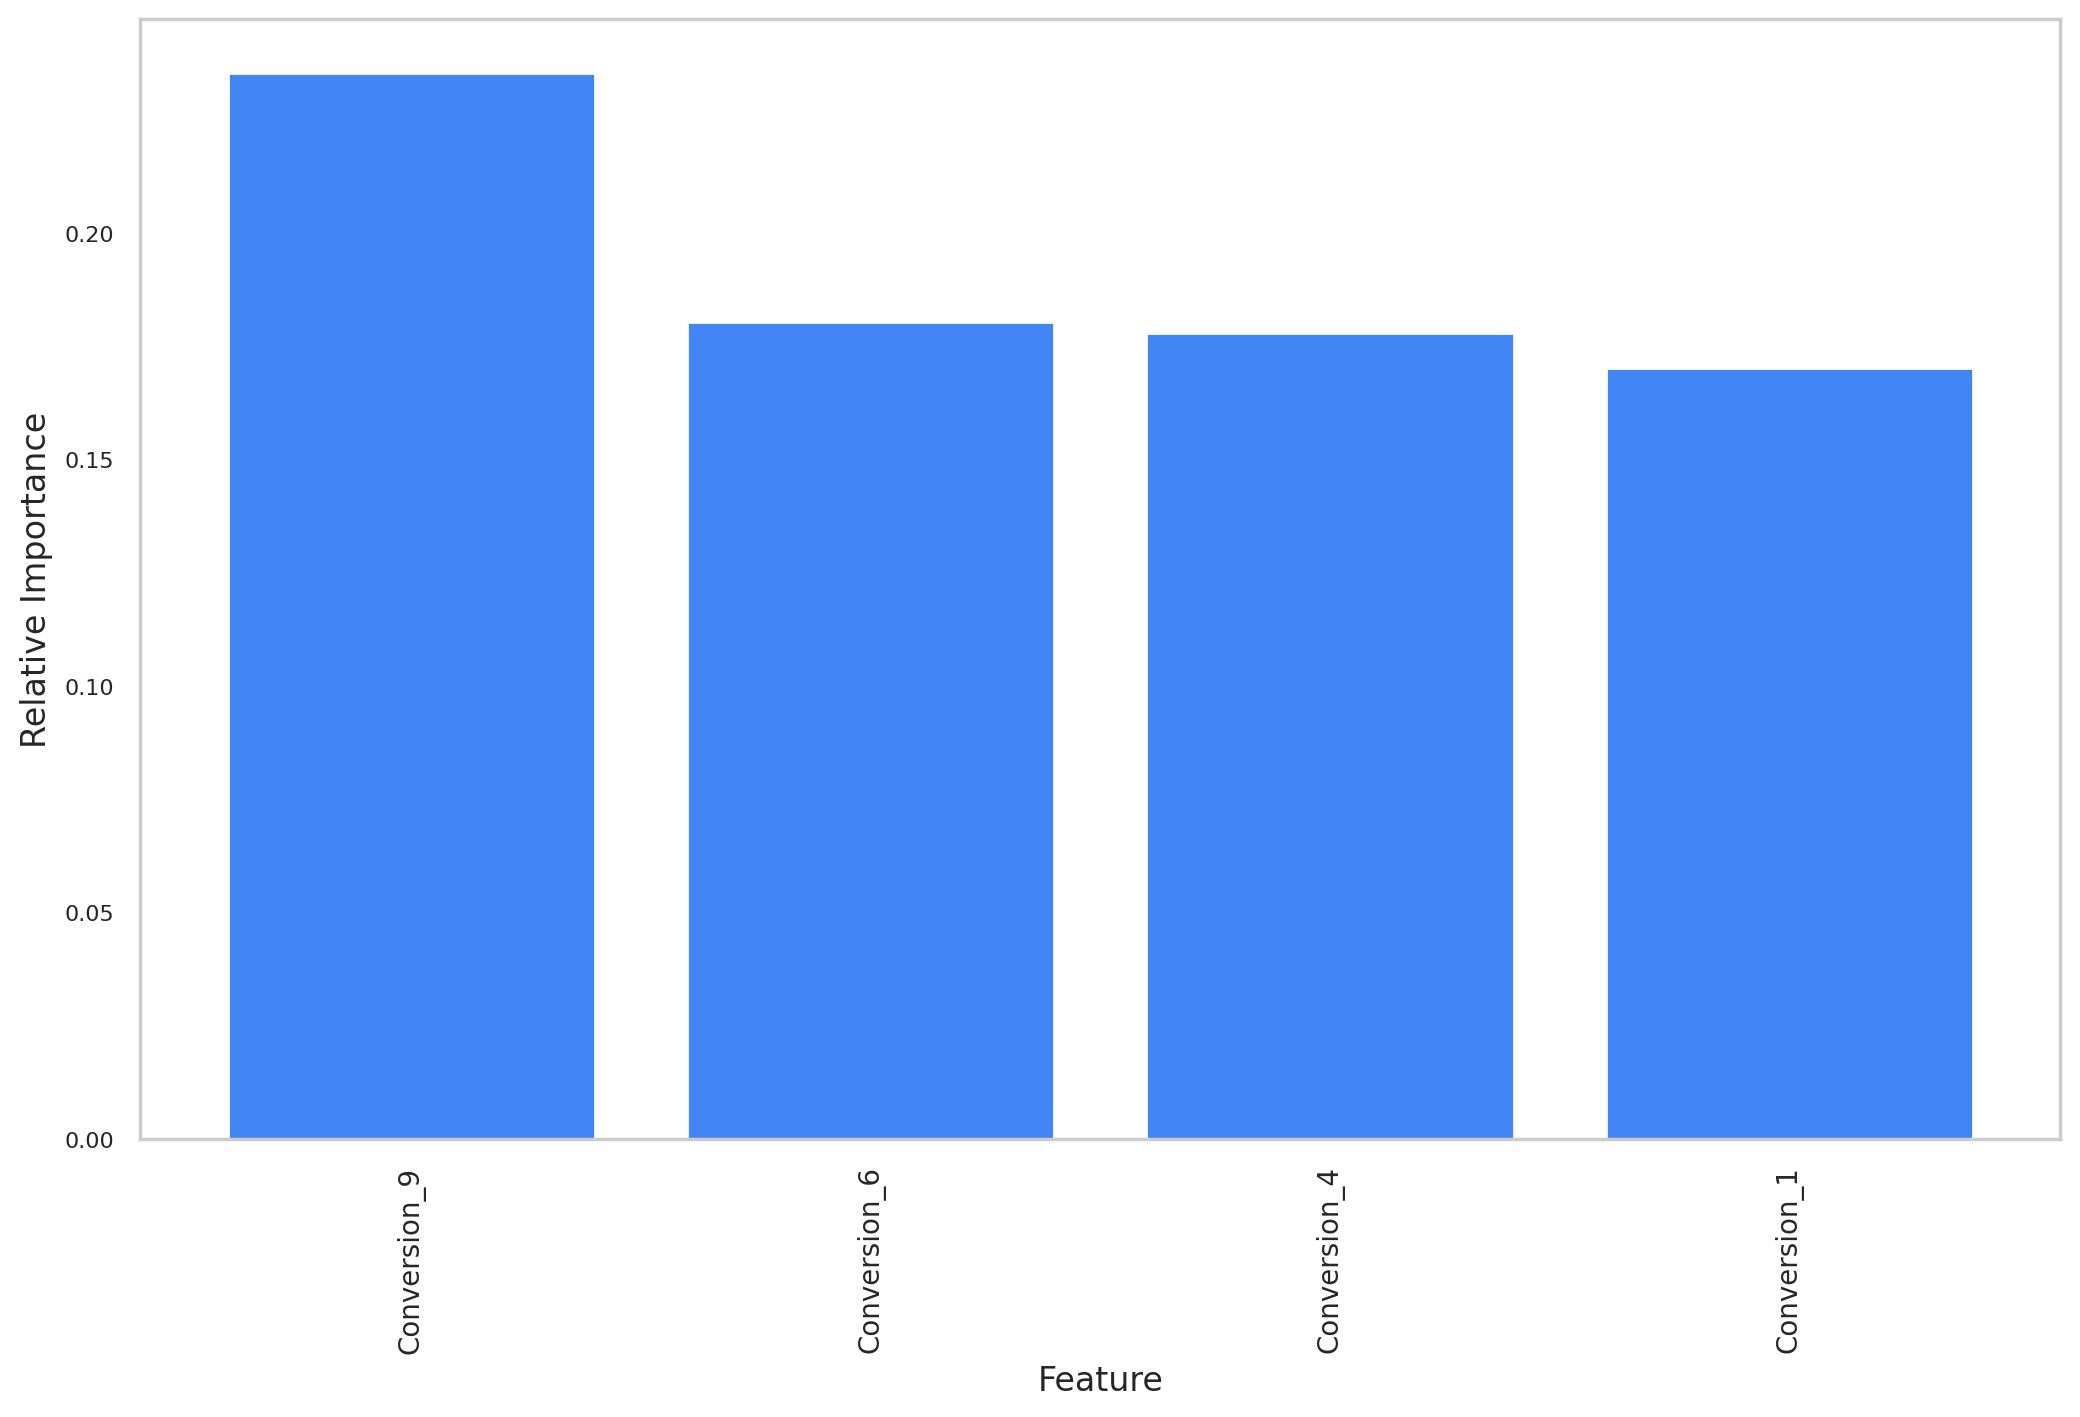

In [ ]:
#@title Plot relative importance output
import matplotlib.pyplot as plt

# sort the dataframe by rawRelaImpt in descending order
df_results = df_results.sort_values(by='rawRelaImpt', ascending=False)

# get the feature names and their corresponding rawRelaImpt values
x_values = df_results['driver'].tolist()
y_values = df_results['rawRelaImpt'].tolist()


fig, ax = plt.subplots(figsize=(12,8))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=8)
# plot the bar chart
plt.bar(x_values, y_values,color='#4285F4')

plt.xticks(rotation=90)
#fig.set_size_inches(10, 6)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# set x-axis label
plt.xlabel('Feature', fontsize = 12)

# set y-axis label
plt.ylabel('Relative Importance', fontsize = 12)

# show the plot
plt.show()


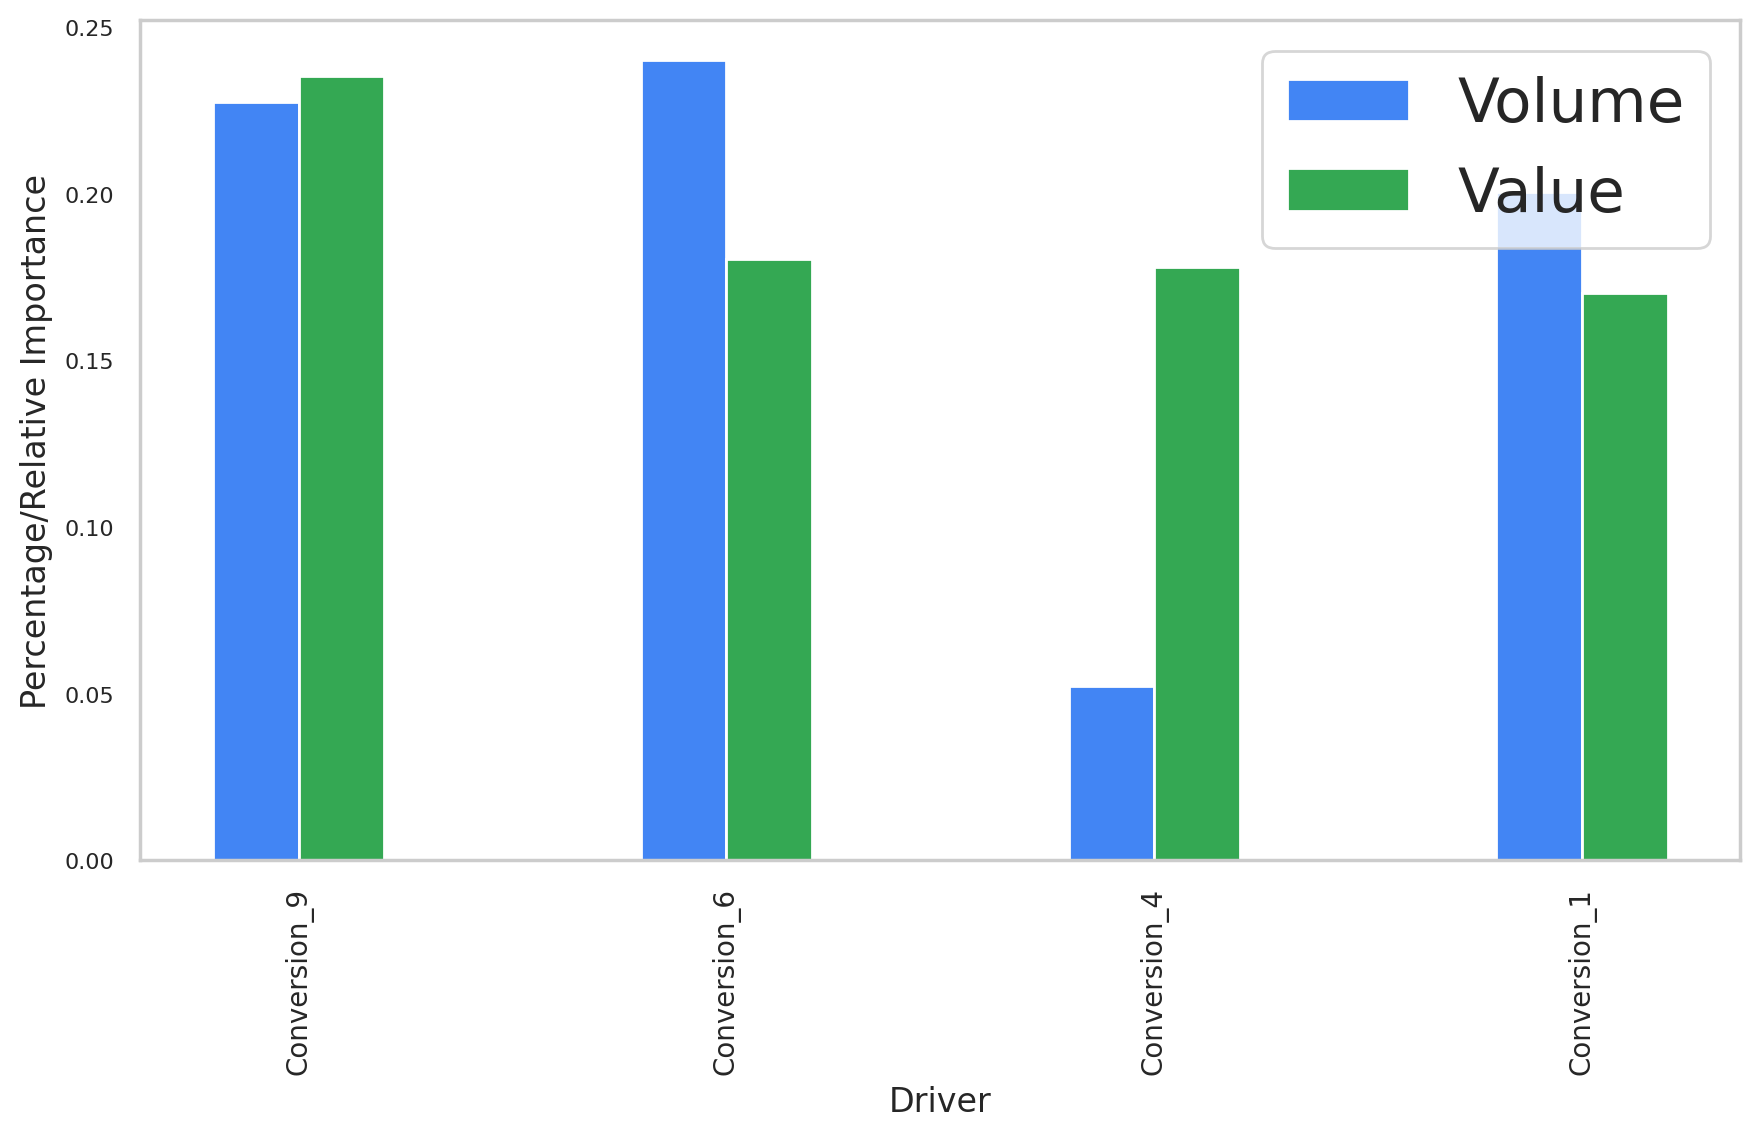

In [ ]:
#@title Volume versus Value - Final output visual 📸
import matplotlib.pyplot as plt

# Create a dictionary mapping driver names to their volumes
driver_to_volume = dict(zip(df_column_sums['Column'].tolist(), df_column_sums['Sum'].tolist()))

# Exclude "Store Visits Total" and "Sales Attribution to the Day" columns
driver_to_volume.pop("Store Visits Total", None)
driver_to_volume.pop("Sales Attribution to the Day", None)

# Get the list of drivers
x_values = df_results['driver'].tolist()

# Remove anything after "_" from the driver names
x_values = [driver.split("<>")[0] for driver in x_values]

# Create a dictionary mapping driver names to their values
driver_to_value = dict(zip(x_values, y_values))

# Create lists for driver names, volume values, and value values
drivers = []
volume_values = []
value_values = []

# Loop through the x_values and calculate the volume and value for each driver
for driver in x_values:
    drivers.append(driver)
    volume_values.append(driver_to_volume[driver] / sum(driver_to_volume.values()))
    value_values.append(driver_to_value[driver])

# Plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.2
opacity = 0.8

# Plot the volume bar
plt.bar(drivers, volume_values, bar_width, color= '#4285F4', label='Volume')

# Shift the x-axis position for the value bar
x_pos = [x + bar_width for x in range(len(drivers))]

# Plot the value bar
plt.bar(x_pos, value_values, bar_width, color= '#34A853', label='Value')

# Set the x-axis labels
plt.xticks([x + bar_width/2 for x in range(len(drivers))], drivers)
plt.xticks(rotation=90)
fig.set_size_inches(10, 6)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
# Shift the x-axis position for the value bar
x_pos = [x + bar_width for x in range(len(drivers))]
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Driver',fontsize=12)
ax.set_ylabel('Percentage/Relative Importance',fontsize=12)
ax.legend()

plt.savefig("Volume versus value.png", bbox_inches="tight")
plt.show()
